Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar
a los tasadores a valuar las propiedades, ya que es un proceso difícil y,a veces, subjetivo. Para ello, propones crear un 
modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

Pensando como un/a Data Scientist

Responde la siguientes pregunta: contestando la pregunta sin explorar el dataset

¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

La tasación de una propiedad es el proceso mediante el cual un profesional determina el valor económico real de un bien raíz
en función de sus características. Los datos que ayudarian a trabajar este problema porian ser el tamaño de la propiedad, 
ubicación de la misma, tipo de edificacion (departamento, casa, etc), en el caso de ser un departamento ubicación dentro 
de el edificio (piso, altura, frente/contrafrente, ascensor, escaleras, si tiene o no balcon) antiguedad, estado en que se
encuentra,calidad de los materiales por ejemplo cómo están hechas las paredes (de ladrillos o en seco), revoques, 
revestimientos, los pisos, los techos, aberturas y qué equipamientos de cocinas, calefacción o termotanques, posee el 
inmueblenúmero de habitaciones, ambientes y baños, antigüedad, cercanía respecto a puntos de interés, características y
valor de su terreno y área construida, etc. si bien hay muchos mas detalles a tener en cuenta para un analisis a grandes 
rasgos se puede comenzar a analizar los datos de lo general hacia lo mas detallado y asi poder ir respondiendo las preguntas
que necesitemos para nuestro analisis

0 - Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

1 - Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras
instancias.

In [2]:
import os


path = os.path.join('c:' + os.sep, 'Users', 'alacivita', 'Desktop', 'Data Cience', 'DS_Proyecto_01_Datos_Properati.csv')
data = pd.read_csv(path)

In [3]:
data.head() #visualizamos las primeras 5 filas, por defecto si no colocamos un nro en head() te deja visualizar las 5 primeras

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Dimensiones del dataset

In [4]:
print(data.shape)

(146660, 19)


tenemos 146660 y 19 culumnas en total

2 - Valores Faltantes: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
#primero sumo los valores nulos para saber el total y luego saco el procentaje de ellos

missing = data.isnull().sum()# * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data.columns,'percent_missing': missing})

print(missing_value_data)

                     column_name  percent_missing
start_date            start_date                0
end_date                end_date                0
created_on            created_on                0
lat                          lat             9925
lon                          lon             9959
l1                            l1                0
l2                            l2                0
l3                            l3                0
rooms                      rooms                0
bedrooms                bedrooms                0
bathrooms              bathrooms             5957
surface_total      surface_total            20527
surface_covered  surface_covered            21614
price                      price                0
currency                currency                0
title                      title                0
description          description                0
property_type      property_type                0
operation_type    operation_type                0


En la columna "lat" tiene 9925 valores faltantes o un 6.767%

En la columna "lon" tiene 9959 valores faltantes o un 6.767%

En la columna "bathrooms" hay 5957 valores faltantes o un 4.061%

En la columna "surface_total" hay 20527 valores faltantes o un 13.996%

En la columna "surface_covered" hay 21614 valores faltantes o un 14.737%

¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para 
las variables categóricas.

In [7]:
data.columns #para visualizar mas comoodamente el nombre de cada culumna

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

Identificamos que tipo de variables tiene cada columna, ya que esto va a influir en el tipo de grafico que vamos a representar:

start_date      (fecha),

end_date        (fecha),

created_on      (fecha),

lat             (numérica),

lon             (numérica),

l1              (categórica),

l2              (categórica),

l3              (categórica),

rooms           (numérica),

bedrooms        (numérica),

bathrooms       (numérica),

surface_total   (numérica),

surface_covered (numérica),

price           (numérica),

currency        (categórica),

title           (categórica),

description     (categórica),

property_type   (categórica),

operation_type  (categórica)

3 - Tipos de propiedad: ¿Cuántos tipos de propiedad hay publicados según este dataset? ¿Cuántos instancias por cada tipo de 
    propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de
    Seaborn. Pistas: Te puede ser útil googlear cómo rotar las etiquetas del eje x

In [8]:
data['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [9]:
#Para analizar este punto, tomé la variable property_type y realicé un countplot para saber la cantidad de publicaciones, en una
#primera instancia realicé un solo grafico, pero el problema que se presentó es que habia tipos de propiedades que tienen un
#numero muy pequeño en cantidad de publicaciones y al realizar el gráfico no se podían visualizar correctamente, 
#asi que dividi en 2:

index=data.property_type.isin(["Departamento","Casa","PH"])
#"Departamento","Casa","PH" son los tipos de propiedad con mas publicaciones en el dataset

index2=data.property_type.isin(["Lote","Oficina","Otro","Local comercial","Casa de campo","Depósito","Cochera"])
#este segundo grupo de tipo de propiedades tienen menos publicaciones

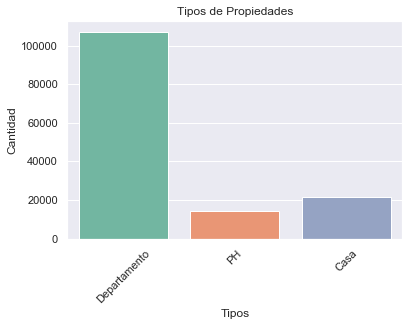

In [10]:
sns.countplot(data = data[index], x = "property_type", palette = "Set2")
plt.title('Tipos de Propiedades')
plt.xlabel('Tipos')
plt.ylabel('Cantidad')
plt.xticks(rotation = 45)
plt.show()

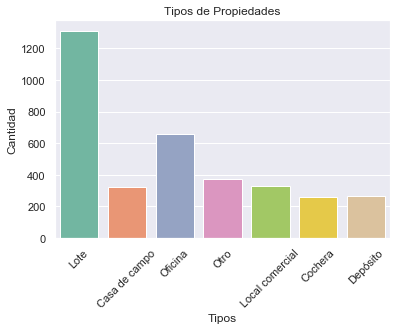

In [11]:
sns.countplot(data = data[index2], x = "property_type",palette = "Set2")
plt.title('Tipos de Propiedades')
plt.xlabel('Tipos')
plt.ylabel('Cantidad')
plt.xticks(rotation = 45)
plt.show()

4 - ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables l2 y l3. Si te animas, puedes hacer los
dos gráficos usando subplot de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen
correctamente.

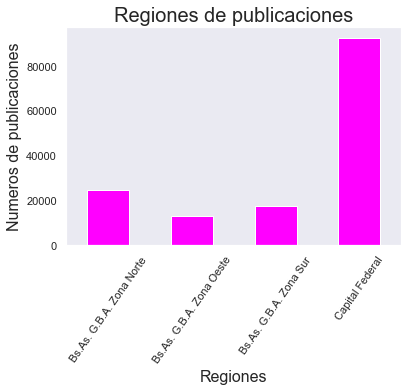

In [12]:
#Para este punto decidí hacer 2 gráficos separados, uno para 'l2'(Regiones) y otro para 'l3'(Barrios)
#ya que en la columna 'l3' al ser muchos los barrios en que hay publicaciones, preferi un gráfico de tamaño grande 

data2=data.groupby(['l2']).size().plot(kind='bar',cmap='spring')
plt.xticks(rotation=55),
plt.title('Regiones de publicaciones',fontsize=20)
plt.xlabel('Regiones',fontsize=16)
plt.ylabel('Numeros de publicaciones',fontsize=16)
plt.grid()
#plt.legend()

In [13]:
data['l2'].value_counts()#aqui podemos visualizar la cantidad más claramente, Capital Federal es la región con más publicaciones

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

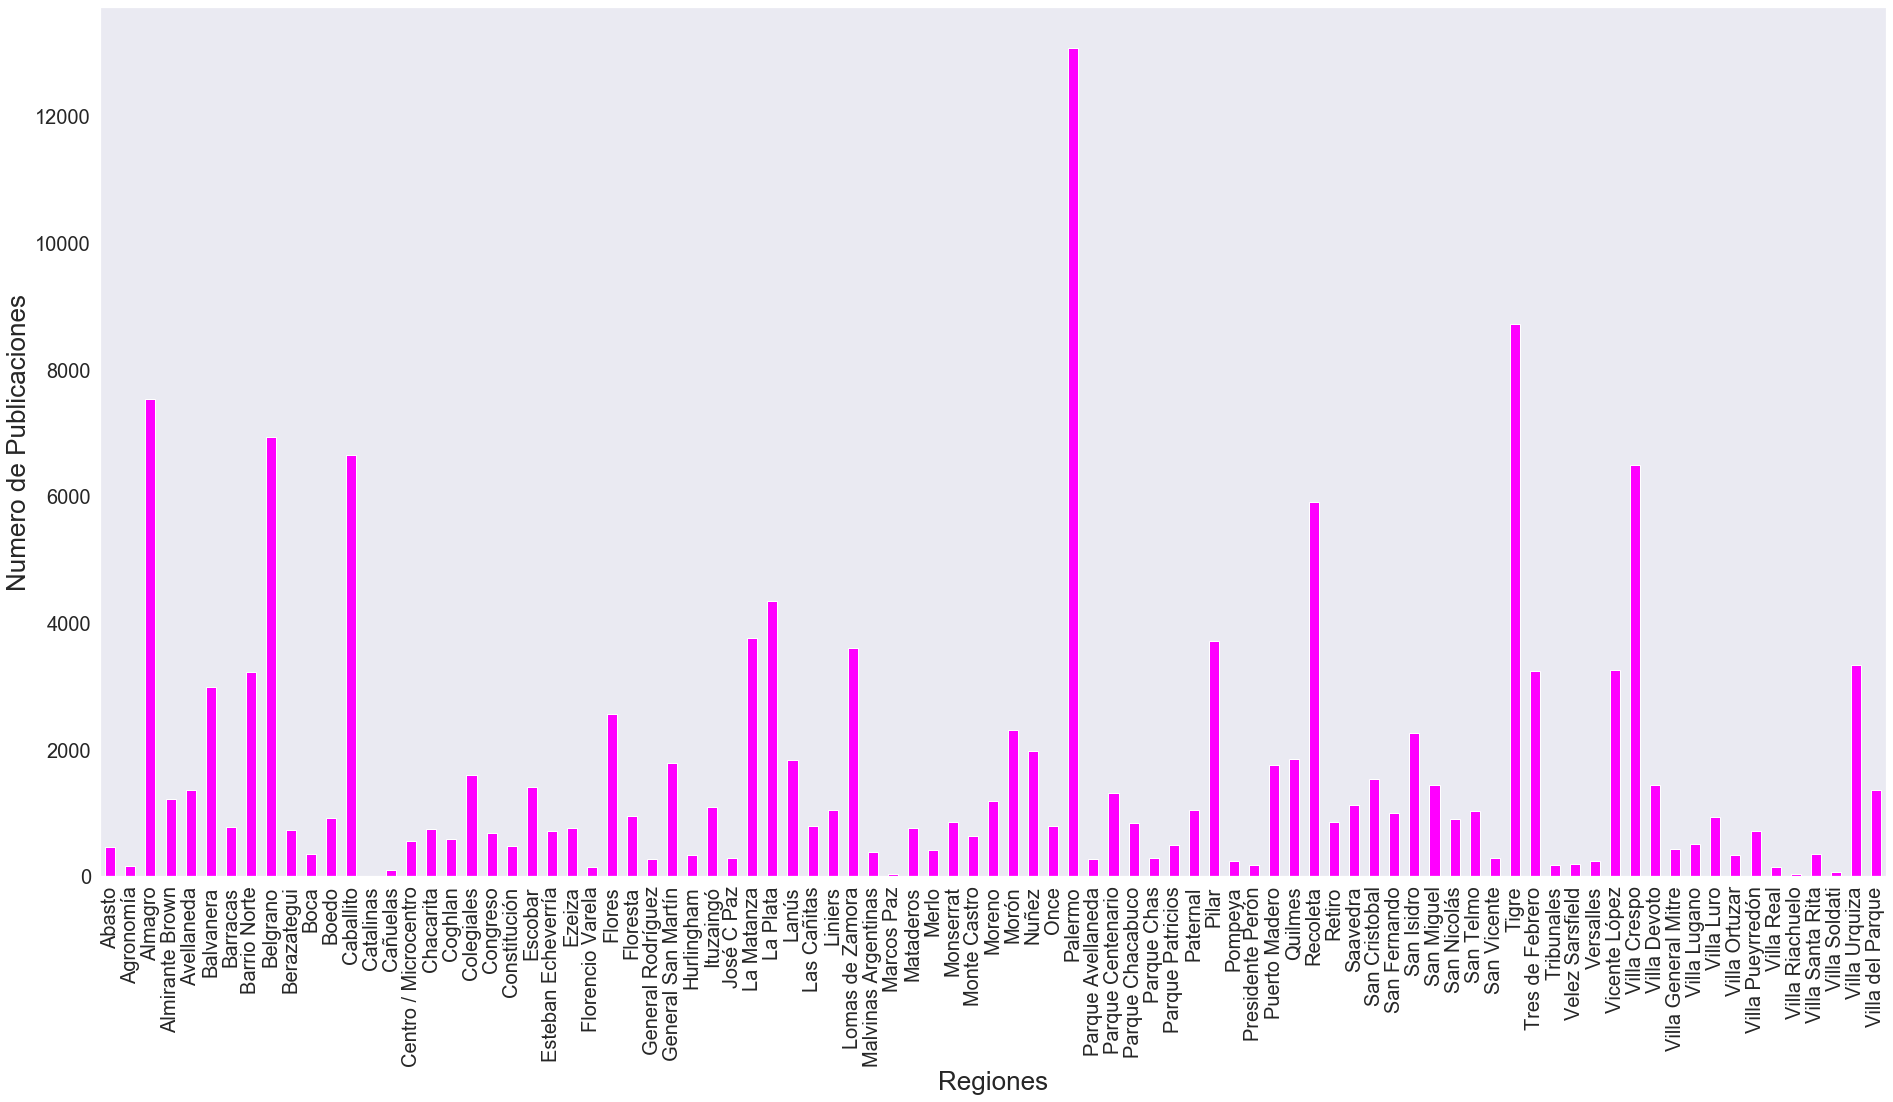

In [14]:
plt.figure(figsize=(32,16))
data.groupby(['l3']).size().plot(fontsize=20,kind='bar',cmap='spring')
plt.xticks(rotation=90)
plt.xlabel('Regiones',fontsize=26)
plt.ylabel('Numero de Publicaciones',fontsize=26)
plt.grid()

Podemos observar que Palermo es el barrio con mayor cantidad de publicaciones, luego le siguen Tigre, Almagro, Belgrano,
Caballito, Villa Crespo y Recoleta

5 - Filtrando el Dataset: A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos 
    de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con
    esas condiciones e imprime su shape

In [15]:
filtro_property_type = data["property_type"].isin(["Departamento","Casa","PH"])
filtro_l2 = data["l2"].isin(["Capital Federal"])

In [16]:
data2=data[filtro_property_type & filtro_l2] 

In [17]:
data2.shape

(91485, 19)

In [18]:
data2.head() #Luego de filtrar podemos observar la informacion de Capital Federal con el tipo de propiedad Departamento,Casa yPH

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


6 - Distribuciones y relaciones de a pares: Estudia la distribución y las relaciones de a pares de las variables rooms, 
    bedrooms, bathrooms, surface_total, surface_covered, price para cada tipo de propiedad. Para ello, ten en cuenta:

6 - 1 - Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables.
¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?

In [19]:
#creo un dataset nuevo con las columnas que necesito
data3 = data2[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

In [20]:
data3.head(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0


6 - 1 Estudiando las correlaciones y valores de las variables

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

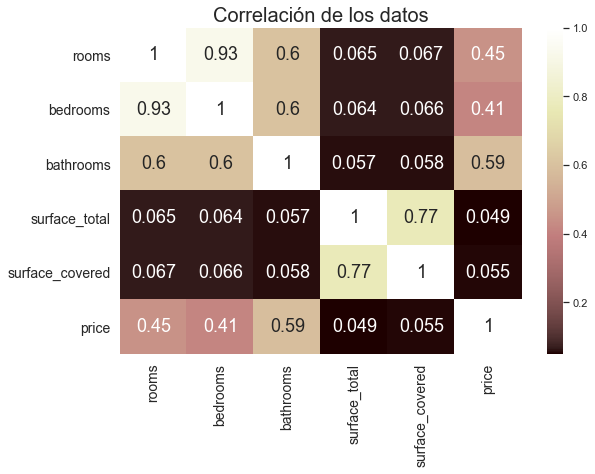

In [21]:
#en el siguiente grafico se visualizan la correlacion de las variables filtradas

plt.figure(figsize=(9,6))
sns.heatmap(data3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr()
            , annot=True, annot_kws={"size": 18},cmap='pink')
plt.title('Correlación de los datos', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

Observando este grafico veo que hay una correlación entre el precio y la superficie cubierta, la cantidad de habitaciones 
con la cantidad de cuartos son las variables más correlacionadas, también existe una correlacion entre el precio y la cantidad 
de cuartos, el precio con la cantidad de baños, la superficie total y cubierta con el precio

In [22]:
#para cada variable estudiamos su mínimo, máximo, promedio (mean), mediana (median) y desvío estándar (std)

data3['rooms'].describe()

count    91485.000000
mean         2.964278
std          1.314704
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         26.000000
Name: rooms, dtype: float64

In [23]:
data3['bathrooms'].describe()

count    89314.000000
mean         1.560147
std          0.860309
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64

In [24]:
data3['bathrooms'].describe()

count    89314.000000
mean         1.560147
std          0.860309
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64

In [25]:
data3['surface_covered'].describe()

count     82250.000000
mean         94.966310
std         778.515243
min           1.000000
25%          44.000000
50%          63.000000
75%          96.000000
max      126062.000000
Name: surface_covered, dtype: float64

In [26]:
data3['price'].describe()

count    9.148500e+04
mean     2.595003e+05
std      3.222654e+05
min      6.000000e+03
25%      1.200000e+05
50%      1.750000e+05
75%      2.790000e+05
max      3.243423e+07
Name: price, dtype: float64

6 - 2 - Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. 
Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles.
Puede ser útil un boxplot para determinar un rango razonable.

6 - 3 - Lo mismo ocurre con valores de superficie total muy chico.

6 - 4 - Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias

In [27]:
#para realizar el filtrado primero debemos eliminar los valores nulos, verificamos:

missing = data3.isnull().sum()# * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data3.columns,'percent_missing': missing})

print(missing_value_data)

                     column_name  percent_missing
rooms                      rooms                0
bedrooms                bedrooms                0
bathrooms              bathrooms             2171
surface_total      surface_total             8917
surface_covered  surface_covered             9235
price                      price                0


In [28]:
data4 = data3.dropna(subset=["surface_covered","surface_total","bathrooms"])

In [29]:
#verifico que se borraron

missing = data4.isnull().sum()# * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data3.columns,'percent_missing': missing})

print(missing_value_data)

                     column_name  percent_missing
rooms                      rooms                0
bedrooms                bedrooms                0
bathrooms              bathrooms                0
surface_total      surface_total                0
surface_covered  surface_covered                0
price                      price                0


In [30]:
#verifico que valores son los que se alejan demasiado del promedio
(count, division)= np.histogram(data4.surface_total)
bins = []
for i in range(0,len(division)-1):
    bins.append((division[i],division[i+1]))

bins = pd.DataFrame({'bin': bins,
                     'cantidad': count})
bins

,bin,cantidad
0,"(10.0, 12615.2)",81197
1,"(12615.2, 25220.4)",7
2,"(25220.4, 37825.600000000006)",0
3,"(37825.600000000006, 50430.8)",1
4,"(50430.8, 63036.0)",0
5,"(63036.0, 75641.20000000001)",0
6,"(75641.20000000001, 88246.40000000001)",0
7,"(88246.40000000001, 100851.6)",0
8,"(100851.6, 113456.8)",2
9,"(113456.8, 126062.0)",3


Se puede observar que hay superficies totales muy grandes, como la de 126.062 m2 y otras muy pequeñas como 10 m2
estos valores no parecen representativos para el análisis, por lo danto debemos filtrarlos

In [31]:
data4_f = data4[(data4.surface_total < data4.surface_total.quantile(.95))
                                & (data4.surface_total > data4.surface_total.quantile(.02))]

In [32]:
#verificamos nuevamente
(count, division)= np.histogram(data4_f.surface_total)
bins = []
for i in range(0,len(division)-1):
    bins.append((division[i],division[i+1]))

bins = pd.DataFrame({'bin': bins,
                     'cantidad': count})
bins

,bin,cantidad
0,"(31.0, 52.8)",22187
1,"(52.8, 74.6)",18827
2,"(74.6, 96.4)",12372
3,"(96.4, 118.2)",7235
4,"(118.2, 140.0)",4537
5,"(140.0, 161.8)",3743
6,"(161.8, 183.6)",2317
7,"(183.6, 205.4)",1765
8,"(205.4, 227.20000000000002)",1184
9,"(227.20000000000002, 249.0)",870


Se verifica que ya no están esos valores tan extremos
Ahora se filtran los datos que tienen surface_covered mayor a surface_total

In [33]:
data5_f= data4_f.where(data4_f['surface_covered'] < data4_f['surface_total'])

6 - 5 El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra
por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango 
razonable.

In [34]:
data6_f = data5_f.where(data5_f['price'] < 700000)

In [35]:
#verifico los valores del dataset filtrado

In [36]:
data6_f['price'].min()

14000.0

In [37]:
data6_f['price'].max()

699999.0

In [38]:
data6_f['price'].mean()

216298.21813534186

Ahora se filtro el dataset, con algunos gráficos se podrá ver como se relacionan las variables

Primero veré como se relaciona el precio de una propiedad con la cantidad de cuartos que posee, el precio máximo
filtrado son 700.000 USD

Text(0.5, 0, 'cantidad de cuartos')

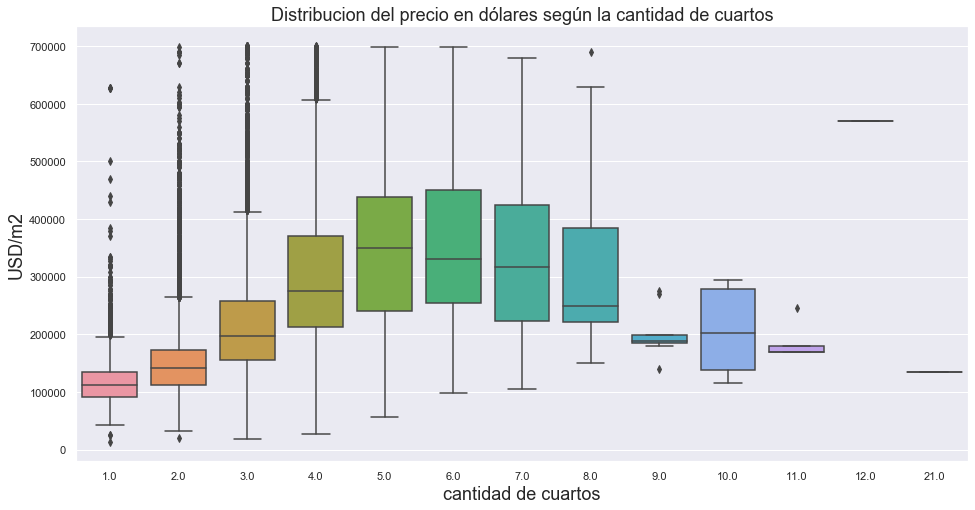

In [39]:
plt.figure(figsize=(16,8))
g = sns.boxplot(x='rooms',y='price',data=data6_f)
g.set_ylabel('USD/m2',size=18)
g.set_title('Distribucion del precio en dólares según la cantidad de cuartos',fontsize=18),
g.set_xlabel('cantidad de cuartos',size=18)

Por lo que se puede observar en el boxplot a grandes rasgos, a mayor cantidad de cuartos no significa que la propiedad sera más
cara, si bien entre 4 y 7 cuartos el 50% de los datos se encuentran entre los 200.000 USD y los 320.000 USD, existen
propiedades de 1 o 2 cuartosque superan los 500.000 USD, estas preopiedades tienen un promedio entre los 100.000 y 150.000 USD

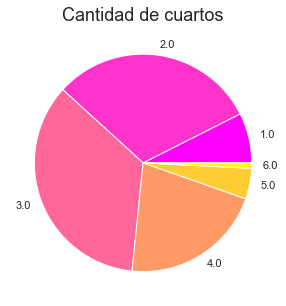

In [40]:
#otro grafico para observar la cantidad de cuartos
#filtro menores a 7 cuartos ya que las propiedades mas abundantes del dataset son menores a 7 cuartos
data_room = data6_f.loc[data6_f.rooms < 7,['rooms','price']]
grouped_rooms = data_room.groupby('rooms').size().plot(kind='pie', figsize=(5,5),cmap='spring',fontsize=11)
plt.title('Cantidad de cuartos', fontsize = 18)
plt.ylabel('')
plt.show();

En este grafico se puede observar que las propiedades con 2 y 3 cuartos son un poco mas del 50% del dataset

Text(0.5, 0, 'cantidad de habitaciones')

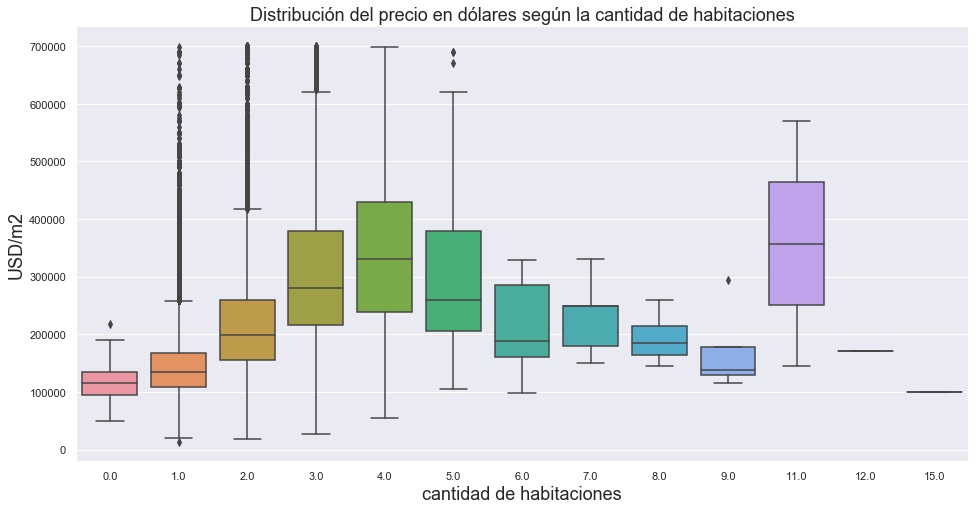

In [41]:
plt.figure(figsize=(16,8))
g2 = sns.boxplot(x='bedrooms',y='price',data=data6_f)
g2.set_ylabel('USD/m2',size=18)
g2.set_title('Distribución del precio en dólares según la cantidad de habitaciones',fontsize=18),
g2.set_xlabel('cantidad de habitaciones',size=18)

Se puede observar que a partir de 2 habitaciones tiene una importante suba de precio hasta 3 habitaciones,con respecto al 
número el precio promedio no varia mucho entre 3 a 6 habitaciones, de 7 a 9 el precio esta entre 150.000 y 250.000 USD 
aproximadamente,por lo que se puede ver que las propiedades de 4 a 6 superan su precio, el promedio esta entre 150.000
a 420.000, incluso existen propiedadesde 2 habitaciones que superan los 600.000 USD, esto puede deberse a la zona donde estan
ubicados, pero este análisis se detallará más adelante. 
Se pueden ver tambien propiedades de 11 habitaciones entre 250.000 y 470.000 USD aproximadamente

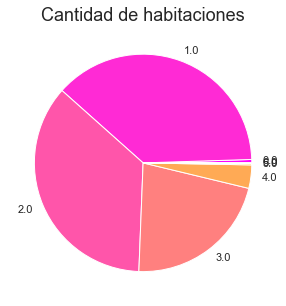

In [42]:
#filtramos las propiedades con número de habitaciones más frecuentes 
data_bedroom = data6_f.loc[data6_f.bedrooms < 7,['bedrooms','price']]
grouped_bedrooms = data_bedroom.groupby('bedrooms').size().plot(kind='pie', figsize=(5,5),cmap='spring',fontsize=11)
plt.title('Cantidad de habitaciones', fontsize = 18)
plt.ylabel('')
plt.show();

Se puede observar que las propiedades de 1 y 2 habitaciones cubren el 75% del dataset aproximadamente, y luego siguen las de 3

Text(0.5, 0, 'cantidad de baños')

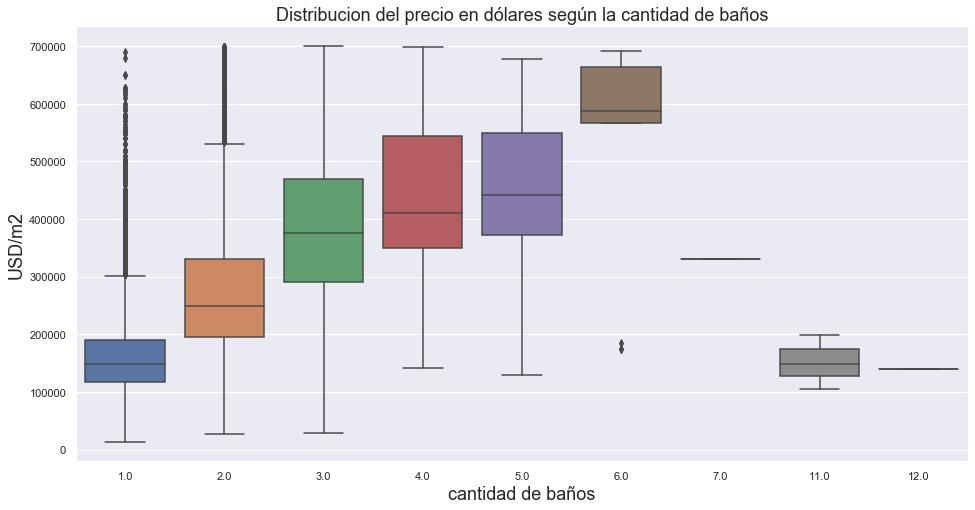

In [43]:
plt.figure(figsize=(16,8))
g3 = sns.boxplot(x='bathrooms',y='price',data=data6_f)
g3.set_ylabel('USD/m2',size=18)
g3.set_title('Distribucion del precio en dólares según la cantidad de baños',fontsize=18),
g3.set_xlabel('cantidad de baños',size=18)

Se puede observar en este gráfico que a mayor cantidad de baños, más cara la propiedad, podemos ver que las propiedades con 
6 baños su precio es de 550.000 a 700.000 USD aproximadamente, las propiedades entre 4 y 5 baños su precio promedio esta entre
360.000 a 540.000 USD aproximadamente, hay algunas exepciones de propiedades de 1 o 2 baños que superan los 600.000 USD, y
podemos ver un caso aislado de propiedades con 11 baños que su precio es menor a 200.000 USD, habría que verificarlo para
ver de que propiedad tipo de se trata

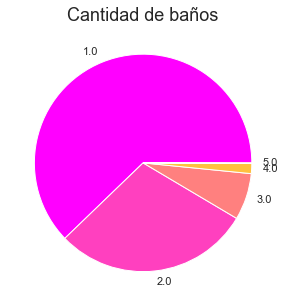

In [44]:
#filtramos las propiedades con menos de 6 baños ya que son las más frecuentes 
data_bathroom = data6_f.loc[data6_f.bathrooms < 6,['bathrooms','price']]
grouped_bathrooms = data_bathroom.groupby('bathrooms').size().plot(kind='pie', figsize=(5,5),cmap='spring',fontsize=11)
plt.title('Cantidad de baños', fontsize = 18)
plt.ylabel('')
plt.show();

Las propiedades de uno y 2 baños son las más frecuentes en este dataset

In [45]:
data7_f = data.where(data['bathrooms'] > 10) #filtramos solo propiedades con más de 10 baños

Text(0.5, 0, 'Tipos')

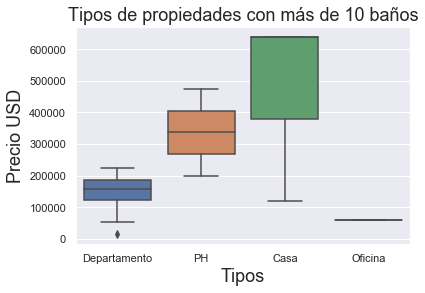

In [46]:
#plt.figure(figsize=(16,8))
g9 = sns.boxplot(x='property_type',y='price',data=data7_f)
g9.set_ylabel('Precio USD',size=18)
g9.set_title('Tipos de propiedades con más de 10 baños',fontsize=18),
g9.set_xlabel('Tipos',size=18)

Text(0.5, 0, 'precio USD')

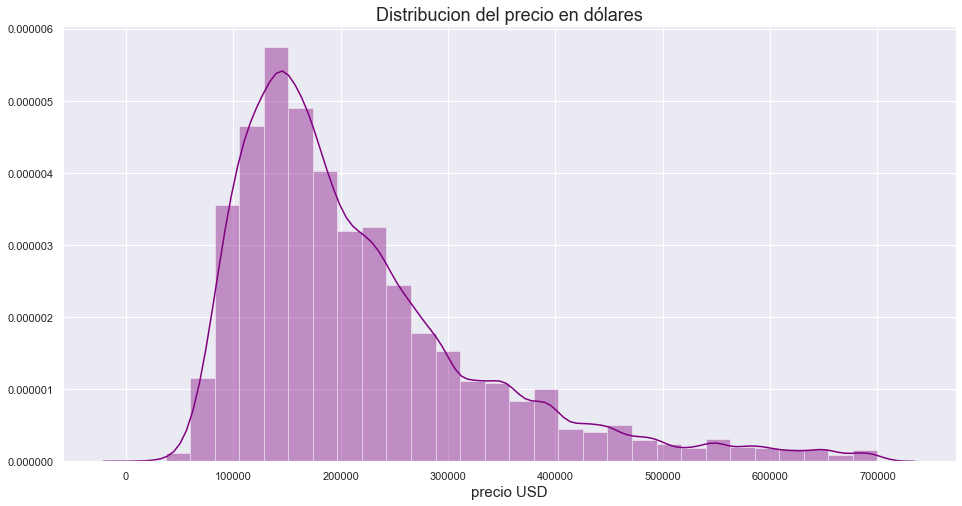

In [47]:
plt.figure(figsize=(16,8)) 
g5=sns.distplot(data6_f['price'], bins = 30, color='purple')
g5.set_title('Distribucion del precio en dólares',fontsize=18),
g5.set_xlabel('precio USD',size=15)

En el gráfico se puede observar que las propiedades de 150.000 a 200.000 USD son las mas abundantes 

Text(0.5, 0, 'Superficie Cubierta')

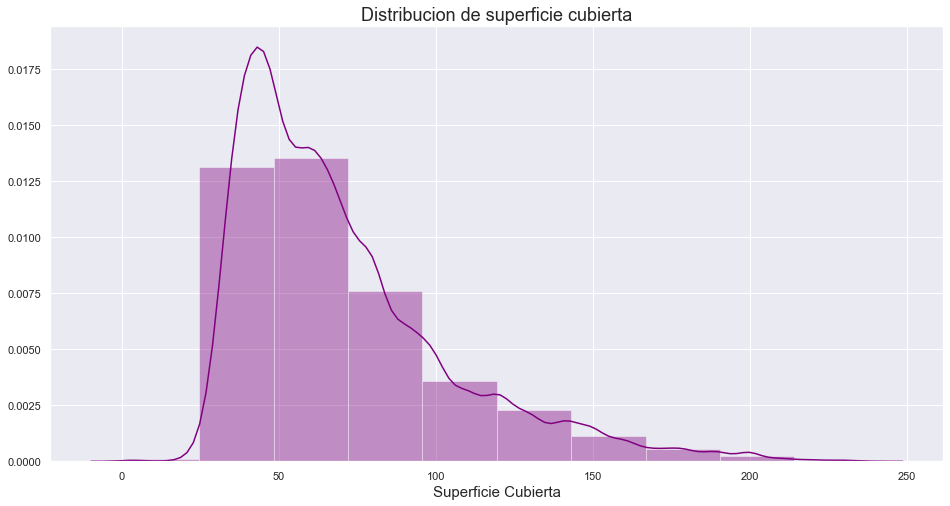

In [48]:
plt.figure(figsize=(16,8))
g6=sns.distplot(data6_f['surface_covered'], bins = 10, color='purple')
g6.set_title('Distribucion de superficie cubierta',fontsize=18),
g6.set_xlabel('Superficie Cubierta',size=15)

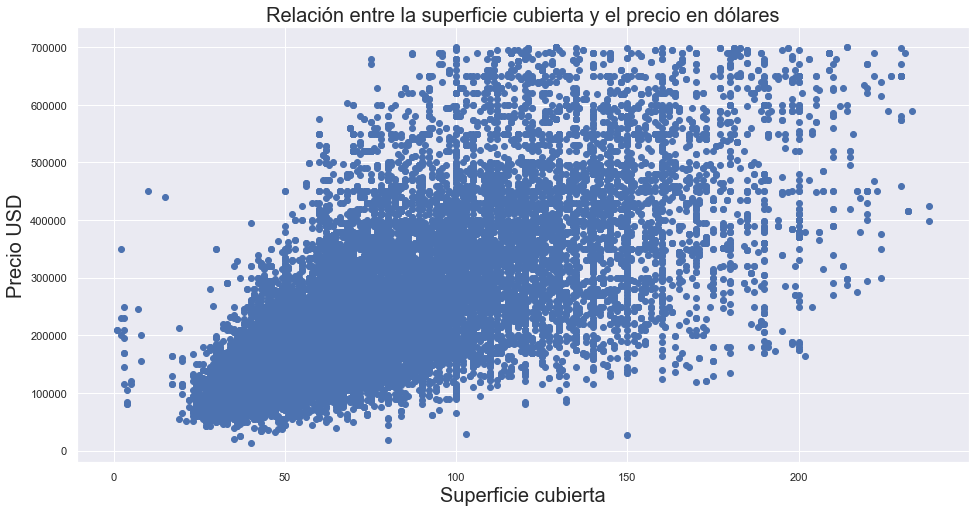

In [49]:
plt.figure(figsize=(16,8))
plt.scatter(x = 'surface_covered', y = 'price', data=data6_f)
plt.title('Relación entre la superficie cubierta y el precio en dólares', fontsize=20)
plt.ylabel('Precio USD',fontsize=20)
plt.xlabel('Superficie cubierta',fontsize=20);

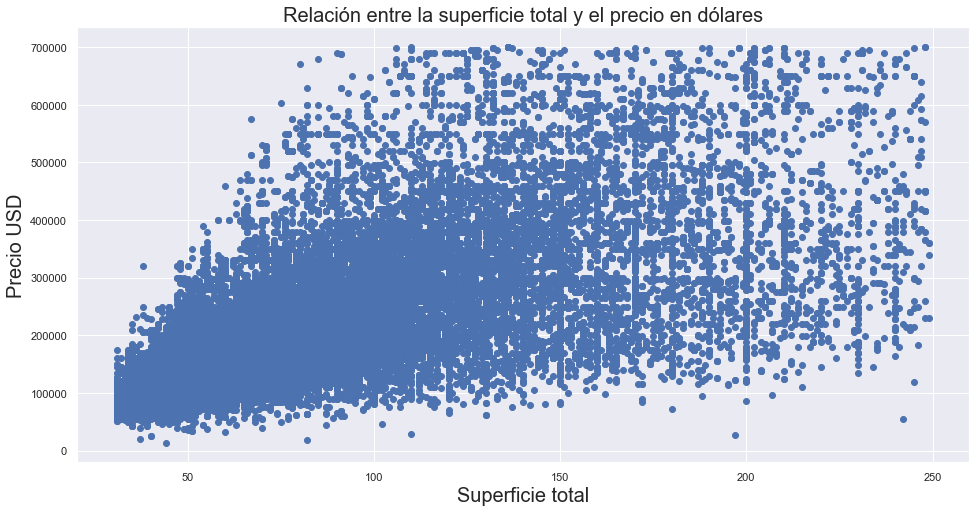

In [50]:
plt.figure(figsize=(16,8))
plt.scatter(x = 'surface_total', y = 'price', data=data6_f)
plt.title('Relación entre la superficie total y el precio en dólares', fontsize=20)
plt.ylabel('Precio USD',fontsize=20)
plt.xlabel('Superficie total',fontsize=20);

Text(0.5, 0, 'Superficie Total')

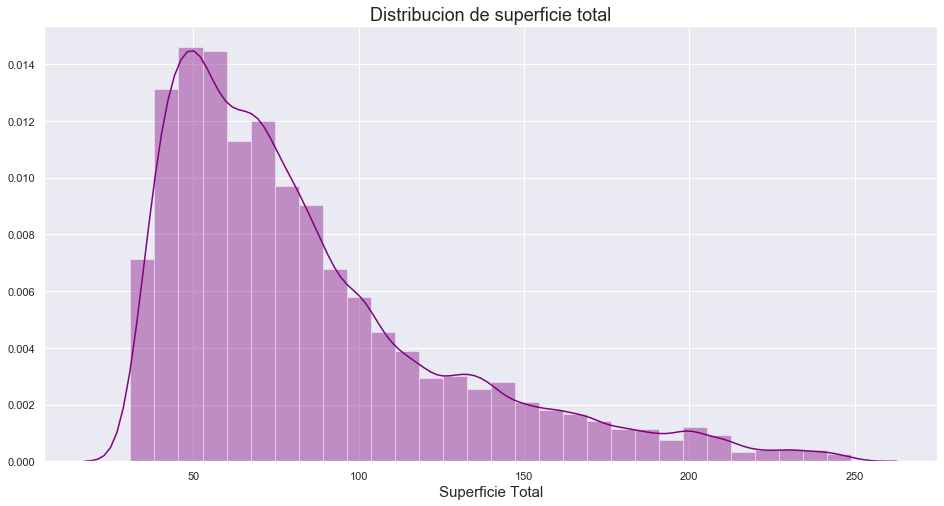

In [52]:
plt.figure(figsize=(16,8))
g7=sns.distplot(data6_f['surface_total'], bins = 30, color='purple')
g7.set_title('Distribucion de superficie total',fontsize=18),
g7.set_xlabel('Superficie Total',size=15)

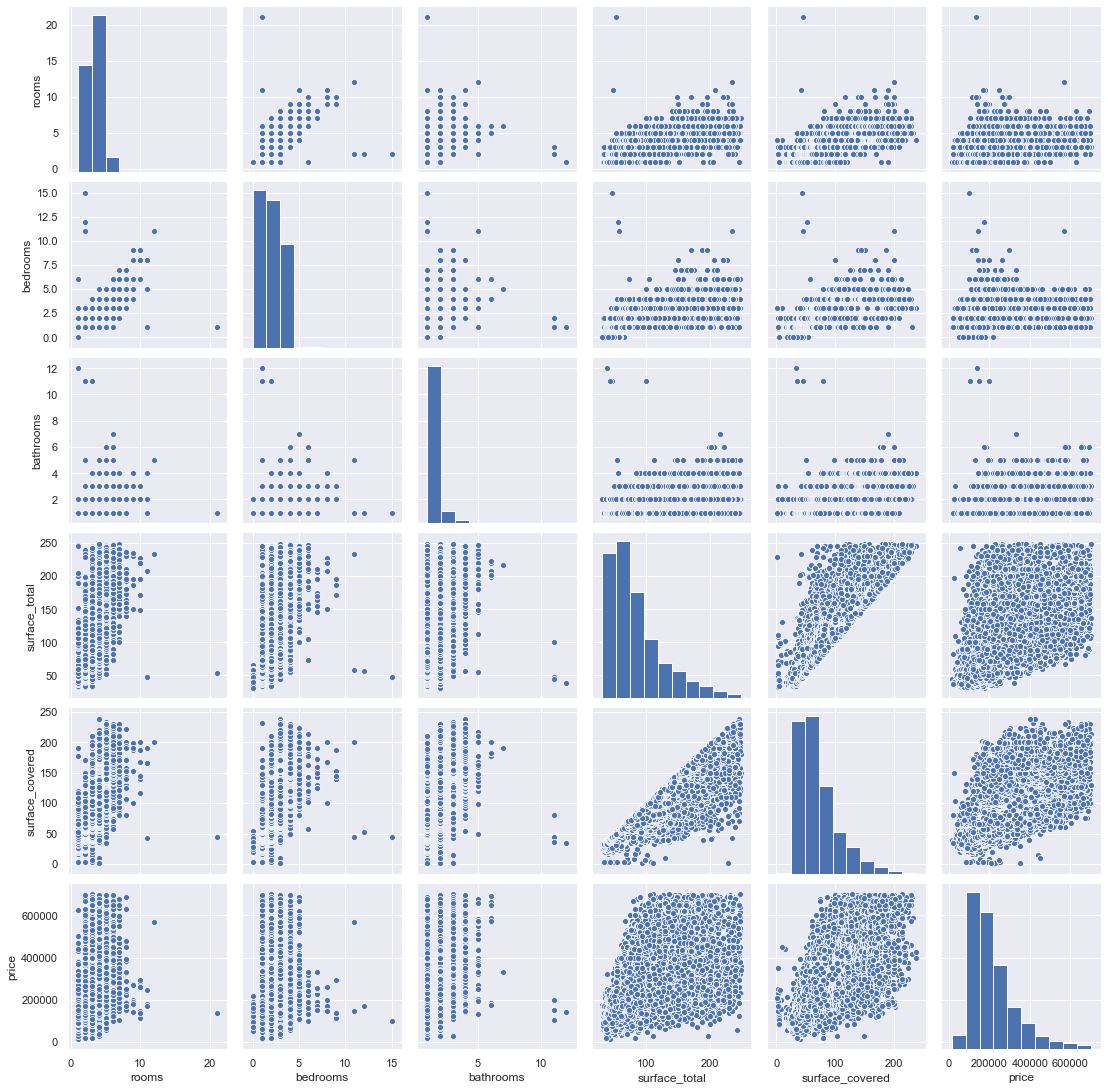

In [53]:
#realizamos un pairplot
sns.pairplot(data6_f, palette='Dark2')

En el pairplot se puede ver como se relacionan las variables entre si

 7 - Correlaciones:
 
Estudia la correlación entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price.
¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

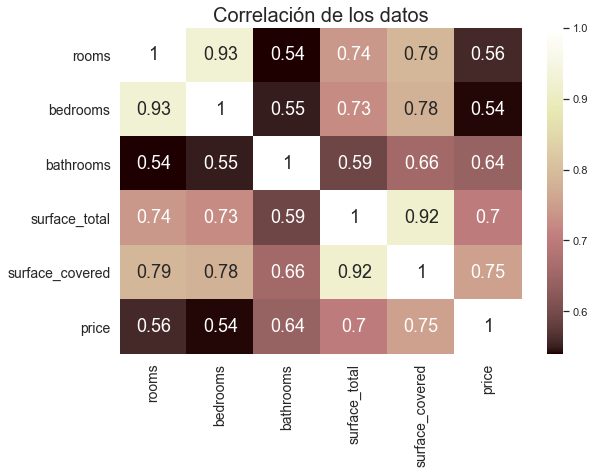

In [54]:
#primero realizamos un grafico heatmap para visualizar la correlacion de todas las variables juntas

plt.figure(figsize=(9,6))
sns.heatmap(data6_f[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr()
            , annot=True, annot_kws={"size": 18},cmap='pink')
plt.title('Correlación de los datos', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

Se puede observar que hay una gran correlación entre la cantidad de cuartos y cantidad de habitaciones, éstos a la vez se
correlacionan con el precio de la propiedad. Se puede ver también que la cantidad de baños y la superficie total y cubierta
de la propiedad se correlaciona con su precio Para ver más en detalle podemos dividir los gráficos en otros más pequeños para
ver que variable es la que se relaciona más con el precio

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

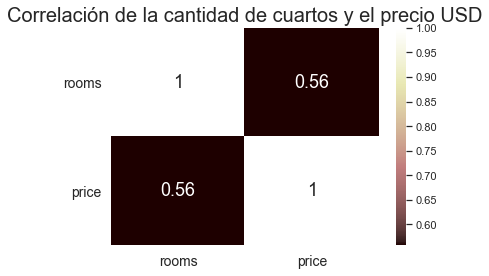

In [55]:
sns.heatmap(data6_f[['rooms','price']].corr()
            , annot=True, annot_kws={"size": 18},cmap='pink')
plt.title('Correlación de la cantidad de cuartos y el precio USD', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

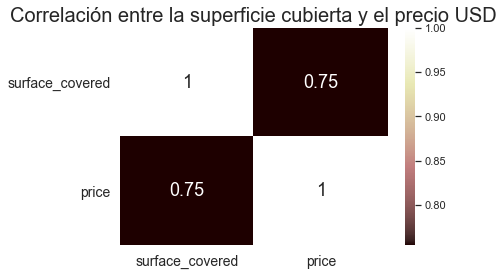

In [56]:
sns.heatmap(data6_f[['surface_covered','price']].corr()
            , annot=True, annot_kws={"size": 18},cmap='pink')
plt.title('Correlación entre la superficie cubierta y el precio USD', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

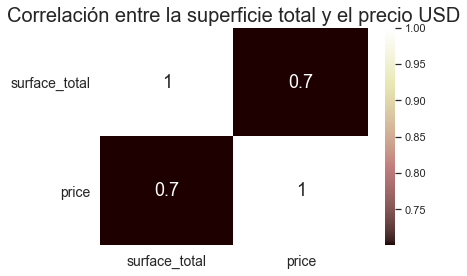

In [57]:
sns.heatmap(data6_f[['surface_total','price']].corr()
            , annot=True, annot_kws={"size": 18},cmap='pink')
plt.title('Correlación entre la superficie total y el precio USD', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

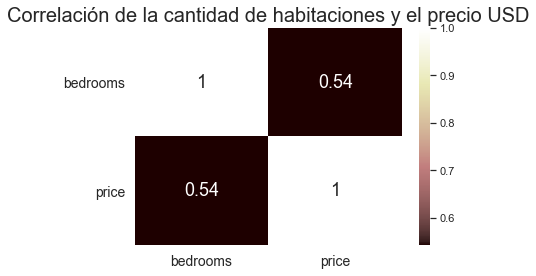

In [58]:
sns.heatmap(data6_f[['bedrooms','price']].corr()
            , annot=True, annot_kws={"size": 18},cmap='pink')
plt.title('Correlación de la cantidad de habitaciones y el precio USD', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

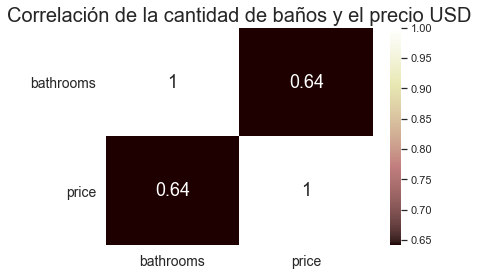

In [59]:
sns.heatmap(data6_f[['bathrooms','price']].corr()
            , annot=True, annot_kws={"size": 18},cmap='pink')
plt.title('Correlación de la cantidad de baños y el precio USD', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

Según los heatmap el precio se correlaciona principalmente por la superficie total, cubierta y la cantidad de baños de la misma.(a mayor cantidad de baños, más cara la propiedad)
En menor medida la cantidad de cuartos y habitaciones, tiene correlacion con el precio. 
Para realizar un análisis más profundo, en este punto se debería agregar la variable 'l3' que son los distintos barrios de
Bueno Aires, asi poder observar como varía el precio de las propiedades según el barrio en que esten ubicados las mismas

DESAFÍO

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser
respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?
(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?
Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset.
Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online,
sino que utilizan otro canal de venta.

PREGUNTA:
    
¿Cuál es el barrio más caro de Buenos Aires? 

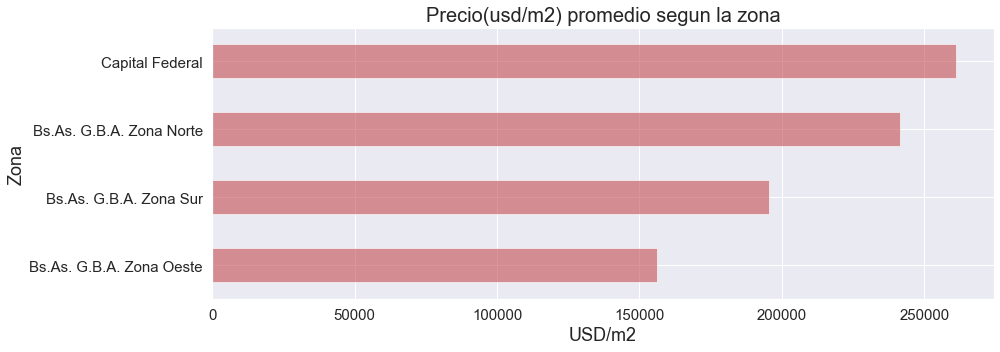

In [60]:
#Análisis por zona

#utilizaré el dataset sin filtrar para ver las zonas más caras y más económicas en general
zonas = data.groupby('l2').mean()['price'].sort_values(ascending=False)[0:19]
grafico_zonas = zonas.sort_values().plot.barh(figsize=(14,5),color='r',fontsize=15, alpha=0.6);
grafico_zonas.set_title("Precio(usd/m2) promedio segun la zona", fontsize=20)
grafico_zonas.set_ylabel("Zona", fontsize=18)
grafico_zonas.set_xlabel("USD/m2", fontsize=18)
plt.show()

En este gráfico podemos observar la distribución de los datos según la zona.
En capital Federal se observan los precios mas altos

In [61]:
data['price'].describe()

count    1.466600e+05
mean     2.412211e+05
std      3.185195e+05
min      5.500000e+03
25%      1.110000e+05
50%      1.660000e+05
75%      2.650000e+05
max      3.243423e+07
Name: price, dtype: float64

In [62]:
q1 = data.price.quantile(0.25)
q2 = data.price.quantile(0.75)
ri = q2 - q1
print("Primer cuartil:", q1)
print("Segundo cuartil:", q2)
print("Rango intercuartílico:", ri)

Primer cuartil: 111000.0
Segundo cuartil: 265000.0
Rango intercuartílico: 154000.0


In [63]:
(count, division)= np.histogram(data.price)
bins = []
for i in range(0,len(division)-1):
    bins.append((division[i],division[i+1]))

bins = pd.DataFrame({'bin': bins,
                     'cantidad': count})
bins

,bin,cantidad
0,"(5500.0, 3248373.2)",146438
1,"(3248373.2, 6491246.4)",205
2,"(6491246.4, 9734119.600000001)",7
3,"(9734119.600000001, 12976992.8)",6
4,"(12976992.8, 16219866.0)",1
5,"(16219866.0, 19462739.200000003)",1
6,"(19462739.200000003, 22705612.400000002)",0
7,"(22705612.400000002, 25948485.6)",0
8,"(25948485.6, 29191358.8)",1
9,"(29191358.8, 32434232.0)",1


In [64]:
#filtramos el dataset data

p10 = np.percentile(data.price, 10)
p95 = np.percentile(data.price, 95)
data_f= data[(data.price >= p10) & (data.price <= p95)]

In [65]:
data_f= data_f.where(data_f['surface_covered'] < data_f['surface_total'])

In [66]:
#verificamos

data_f['price'].describe()

count     78798.00000
mean     214994.46873
std      111500.84392
min       80000.00000
25%      133000.00000
50%      183000.00000
75%      265000.00000
max      620000.00000
Name: price, dtype: float64

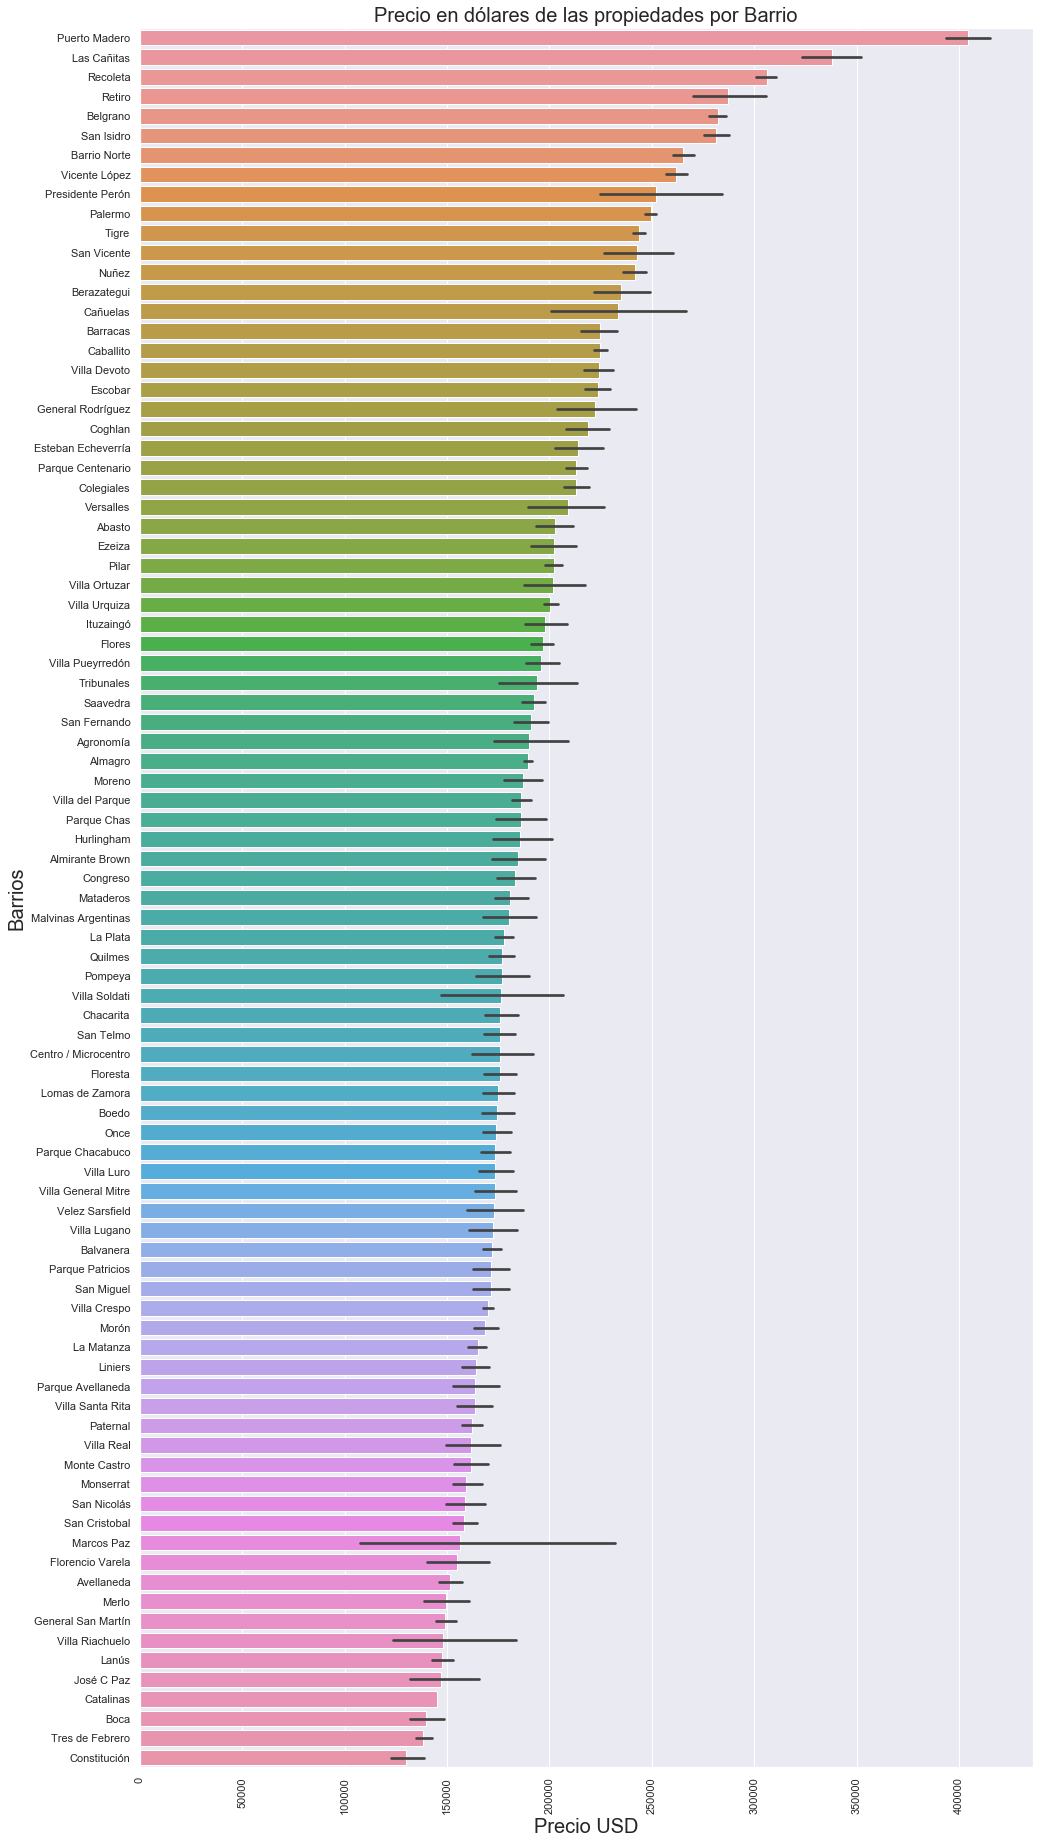

In [67]:
#verifico los precios de las propiedades según los distintos barrios de Buenos Aires en general
plt.figure(figsize=(16,32))
plt.xticks(rotation = 90)
barrios = data_f.groupby('l3').mean().sort_values('price', ascending=False).index
sns.barplot(x="price", y="l3", order=barrios, data=data_f)
plt.title('Precio en dólares de las propiedades por Barrio',fontsize=20)
plt.xlabel('Precio USD',fontsize=20)
plt.ylabel('Barrios',fontsize=20);

verificando este gráfico vemos que el barrio más caro es: PUERTO MADERO

Los 5 barrios mas caros:

1 - Puerto Madero, 2 - San Isidro, 3 - Recoleta, 4 - Las Cañitas, 5 - Presidente Perón

El barrio mas económico es: CONSTITUCION

Los 5 barrios mas economicos:

1 - Constitucion, 2 - Jose C Paz, 3 - San Cristobal, 4 - Tres de Febrero, 5 - Boca

Verificamos los precios de las propiedades segun los barrios dentro de Capital Federal

In [68]:
l2_CP = data_f["l2"].isin(["Capital Federal"]) #filtro para solo barrios de Capital Federal

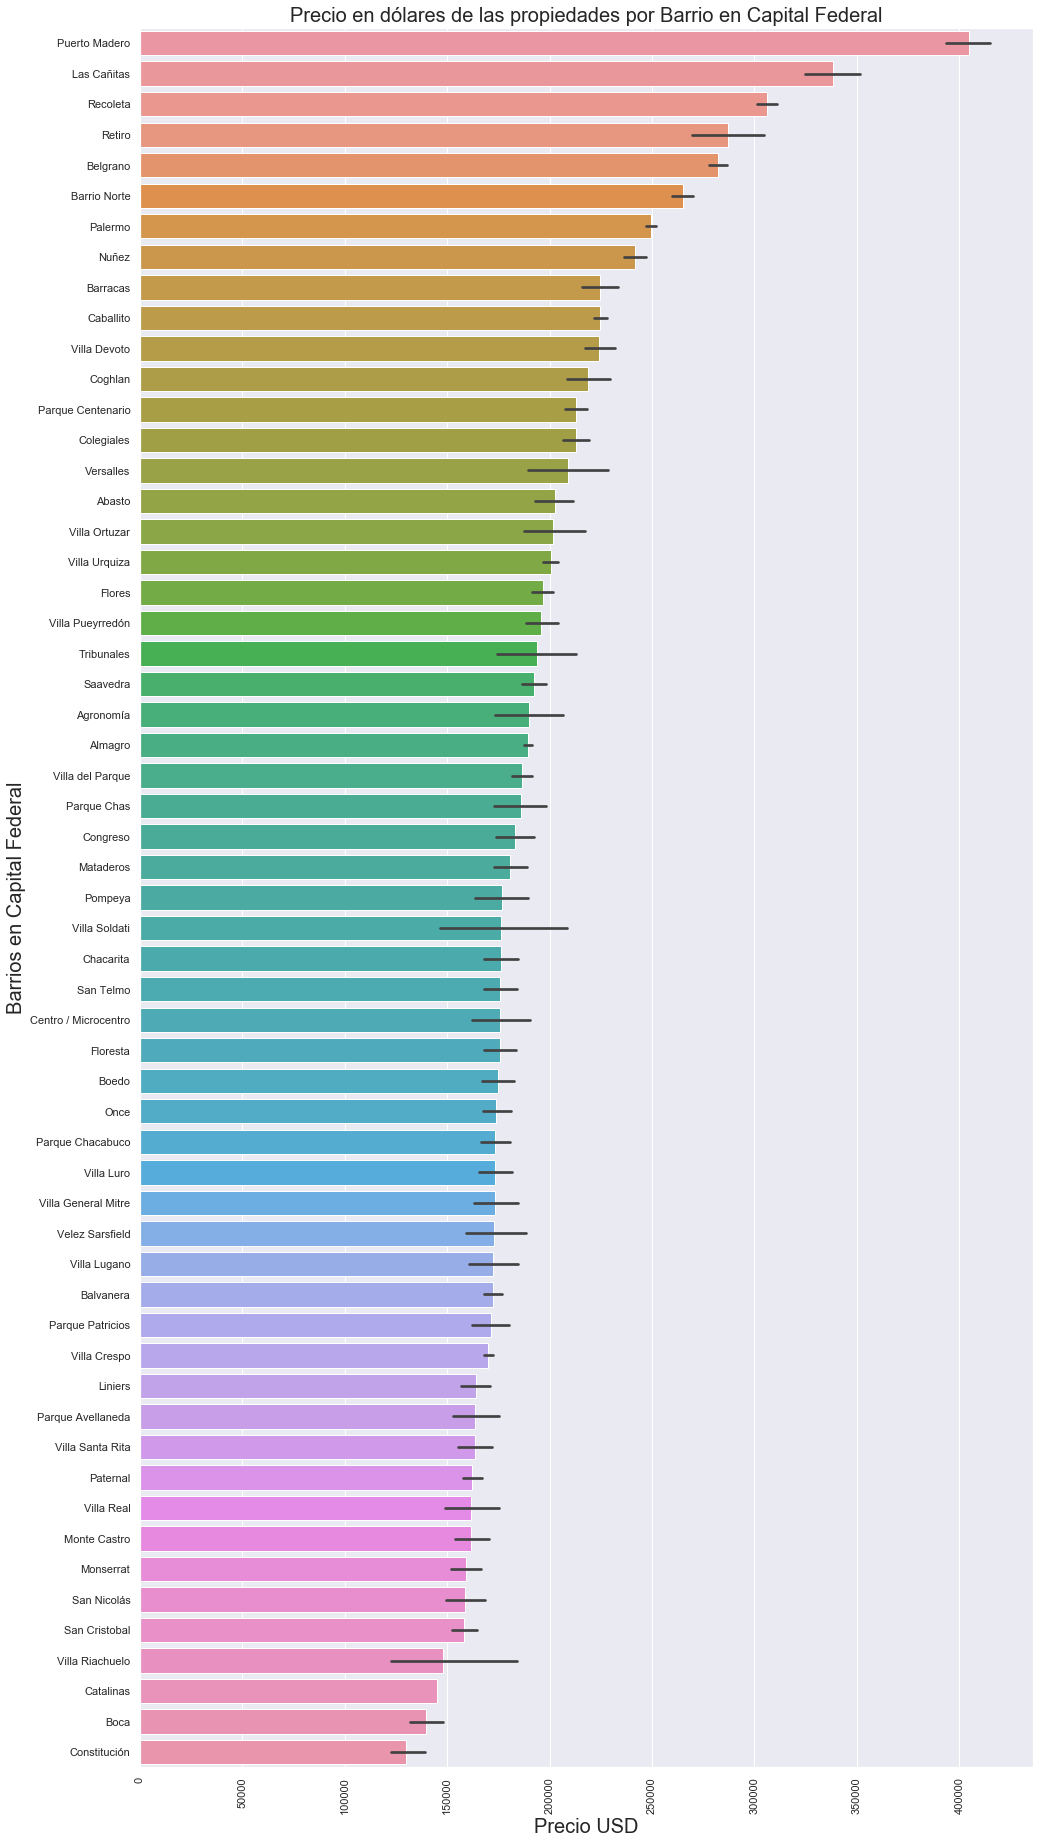

In [69]:
plt.figure(figsize=(16,32))
plt.xticks(rotation = 90)
barrios = data_f[l2_CP].groupby('l3').mean().sort_values('price', ascending=False).index
sns.barplot(x="price", y="l3", order=barrios, data=data_f)
plt.title('Precio en dólares de las propiedades por Barrio en Capital Federal',fontsize=20)
plt.xlabel('Precio USD',fontsize=20)
plt.ylabel('Barrios en Capital Federal',fontsize=20);

In [70]:
index_barrios_econ=data_f.l3.isin(["Constitucion", "Jose C Paz","San Cristobal","Tres de Febrero", "Boca"])

index_barrios_caros=data_f.l3.isin(["Puerto Madero", "San Isidro","Recoleta","Las Cañitas", "Belgrano"])

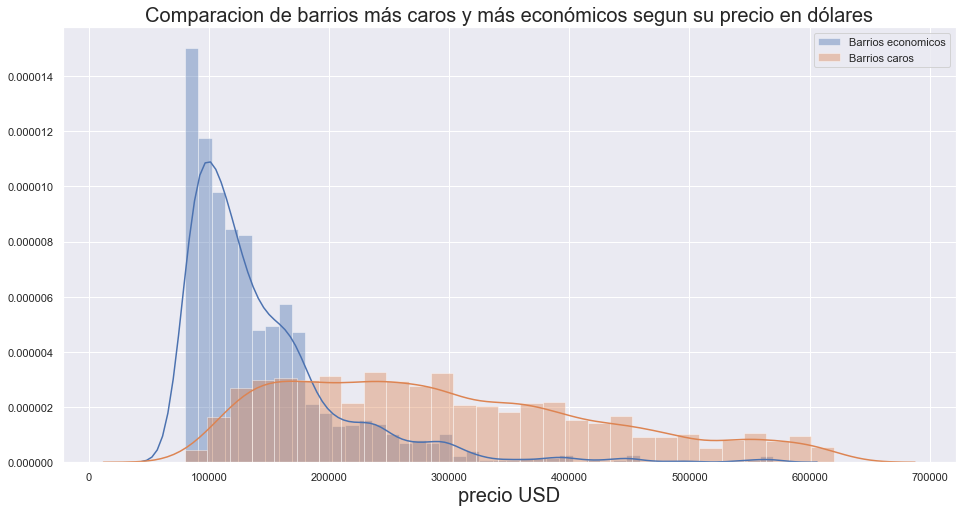

In [71]:
plt.figure(figsize=(16,8))
d = sns.distplot(data_f[index_barrios_econ].price, label="Barrios economicos")
sns.distplot(data_f[index_barrios_caros].price, label="Barrios caros")
plt.title('Comparacion de barrios más caros y más económicos segun su precio en dólares',fontsize=20)
plt.xlabel('precio USD',fontsize=20)
plt.legend()

Analizando más en profundidad y centrandonos solo en los los barrios más caros de Buenos Aires

y centrandonos solo en los los barrios más caros de Buenos Aires
con el filtro de barrios más caros para analizar:

index_barrios_caros=data_f.l3.isin(["Puerto Madero", "San Isidro","Recoleta","Las Cañitas", "Belgrano"])

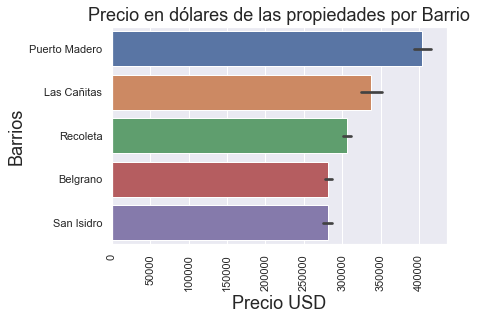

In [72]:
plt.xticks(rotation = 90)
barrios = data_f[index_barrios_caros].groupby('l3').mean().sort_values('price', ascending=False).index
sns.barplot(x="price", y="l3", order=barrios, data=data_f)
plt.title('Precio en dólares de las propiedades por Barrio',fontsize=18)
plt.xlabel('Precio USD',fontsize=18)
plt.ylabel('Barrios',fontsize=18);

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

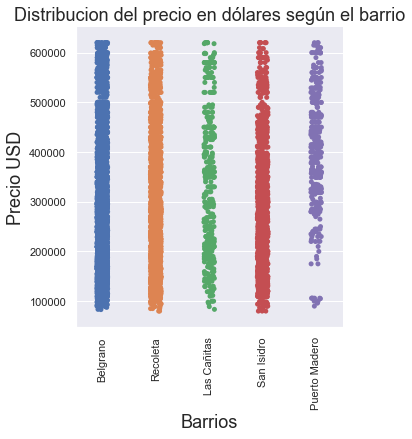

In [73]:
plt.figure(figsize=(20,10))
sns.catplot(x='l3',y='price',data=data_f[index_barrios_caros])
plt.ylabel('Precio USD',size=18)
plt.title('Distribucion del precio en dólares según el barrio',fontsize=18),
plt.xlabel('Barrios',size=18)
plt.xticks(rotation='vertical')

Text(0.5, 0, 'Barrios')

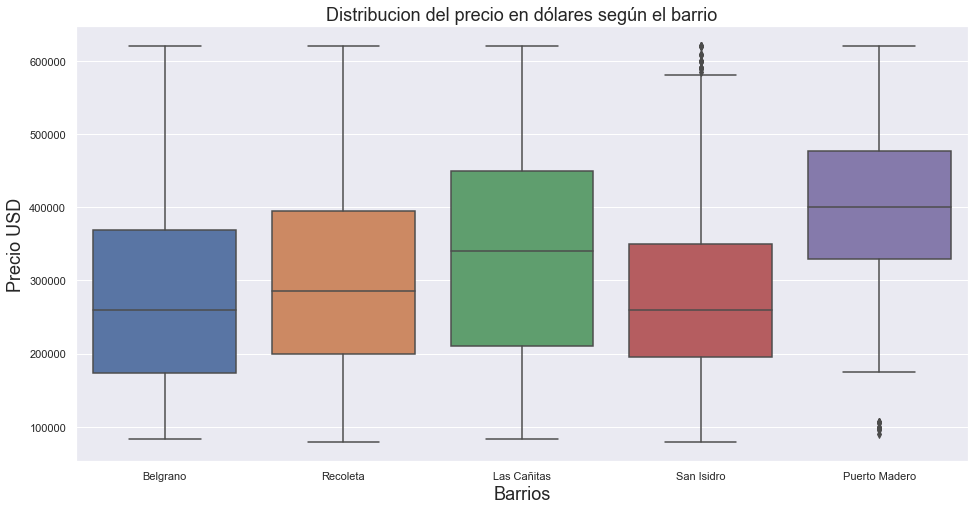

In [74]:
plt.figure(figsize=(16,8))
g8 = sns.boxplot(x='l3',y='price',data=data_f[index_barrios_caros])
g8.set_ylabel('Precio USD',size=18)
g8.set_title('Distribucion del precio en dólares según el barrio',fontsize=18),
g8.set_xlabel('Barrios',size=18)

En el gráfico se puede observar que todas las propiedades tienen una distribución de los precios entre 80.000 y 620.000 USD,
el 50% de los datos están en este rango de precios. La diferencia esta en el valor promedio de cada barrio, por ejemplo en 
Belgrano, Recoleta y San Isidro, los valores de las propiedades en promedio están entre 180.000 y 380.000 USD aproximadamente, 
en Las Cañitas el promedio esta hasta 430.000 USD aproximadamente, y en Puerto Madero el promedio comienza en 310.000
aproximadamente hasta 500.000 USD, por lo tanto el promedio de precios que existe en Puerto Madero es mayor a los otros 
barrios que figuran en el gráfico

Text(0.5, 0, 'Tipos')

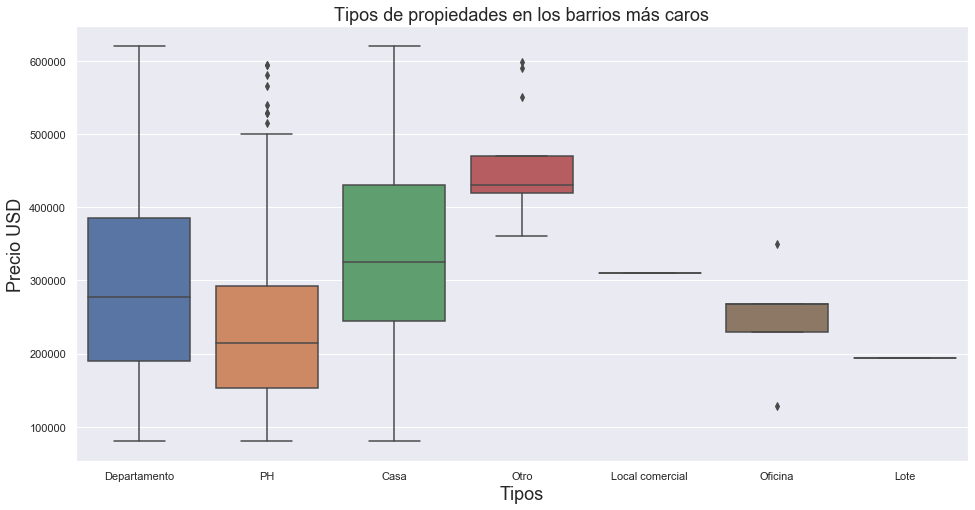

In [75]:
#Realizamos un boxplot para verificar los tipos de propiedades que existen en estos barrios
plt.figure(figsize=(16,8))
g9 = sns.boxplot(x='property_type',y='price',data=data_f[index_barrios_caros])
g9.set_ylabel('Precio USD',size=18)
g9.set_title('Tipos de propiedades en los barrios más caros',fontsize=18),
g9.set_xlabel('Tipos',size=18)

Los Departamentos, Oficinas varia su precio en promedio de entre 150.000 USD y 380.000 USD aproximadamente Los tipos de
propiedad casas tienen un promedio de 250.000 USD a 450.000 USD aproximadamente, en los 3 casos hay propiedades que superan 
los 600.000 USD Los lotes el promedio esta entre 220.000 a 500.000 USD aproximadamente Las oficinas tienen un promedio entre 
130.000 a 330.000 USD aunque hay algunas que llegan hasta los 600.000 USD

In [76]:
index_PM=data_f.l3.isin(["Puerto Madero"]) #filtro solo para Puerto Madero

Text(0.5, 0, 'Tipos de Propiedad')

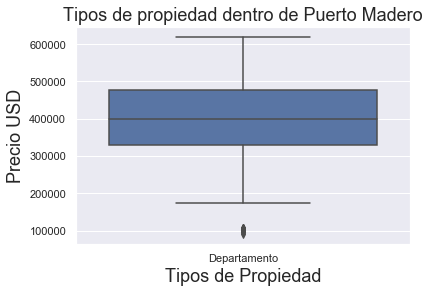

In [77]:
#observaremos los tipos de propiedades que se encuentran en Puerto Madero
#plt.figure(figsize=(16,8))
g10 = sns.boxplot(x='property_type',y='price',data=data_f[index_PM])
g10.set_ylabel('Precio USD',size=18)
g10.set_title('Tipos de propiedad dentro de Puerto Madero',fontsize=18),
g10.set_xlabel('Tipos de Propiedad',size=18)

Los tipos de propiedad en Puerto Madero son Departamentos, con un precio promedio entre 320.000 a 500.000 USD aproximadamente 
pero algunos superan los 600.000 USD

Vamos a observar los tipos de propiedades que existen en los otros barrios

In [78]:
index_LC=data_f.l3.isin(["Las Cañitas"])

Text(0.5, 0, 'Tipos de Propiedad')

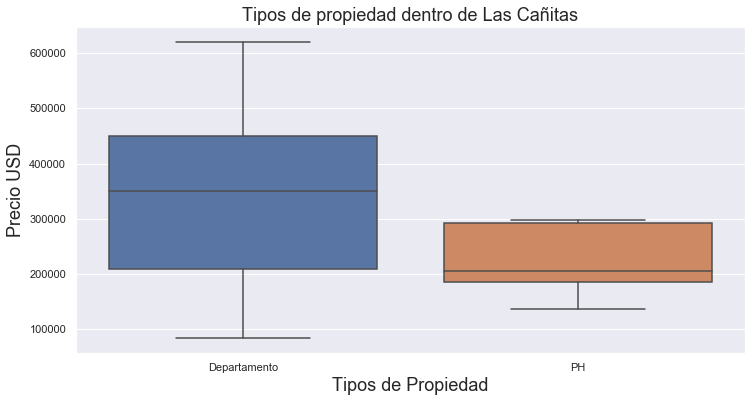

In [79]:
plt.figure(figsize=(12,6))
g11 = sns.boxplot(x='property_type',y='price',data=data_f[index_LC])
g11.set_ylabel('Precio USD',size=18)
g11.set_title('Tipos de propiedad dentro de Las Cañitas',fontsize=18),
g11.set_xlabel('Tipos de Propiedad',size=18)

In [80]:
 index_SI=data_f.l3.isin(["San Isidro"])

Text(0.5, 0, 'Tipos de Propiedad')

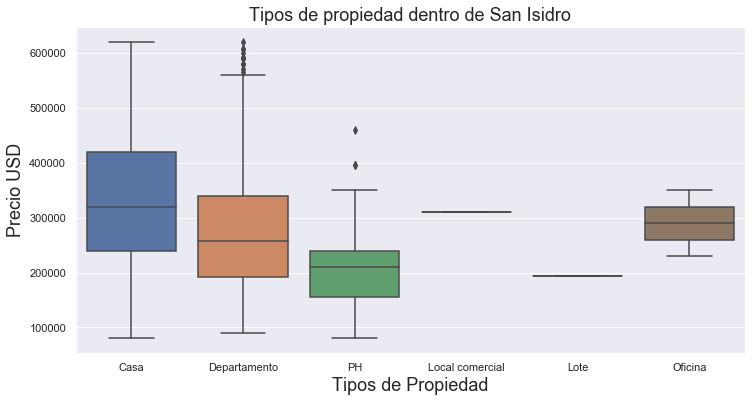

In [81]:
 plt.figure(figsize=(12,6))
g12 = sns.boxplot(x='property_type',y='price',data=data_f[index_SI])
g12.set_ylabel('Precio USD',size=18)
g12.set_title('Tipos de propiedad dentro de San Isidro',fontsize=18),
g12.set_xlabel('Tipos de Propiedad',size=18)

En San Isidro que no está dentro de Capital Federal, podemos observar varios tipos de propiedades como casas, depósitos, 
locales, Departamentos, oficinas etc

In [82]:
 index_BEL=data_f.l3.isin(["Belgrano"])

Text(0.5, 0, 'Tipos de Propiedad')

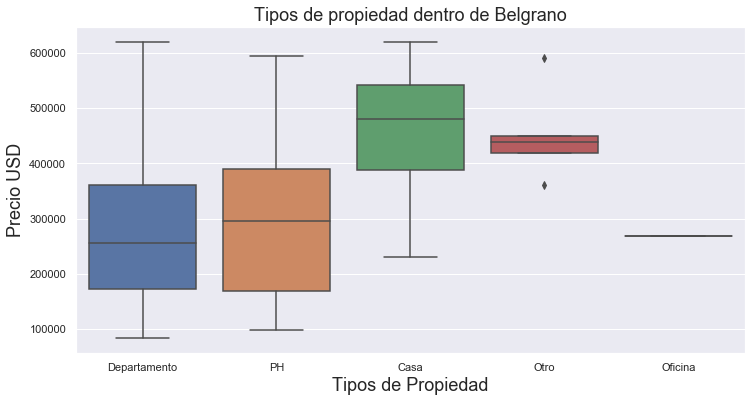

In [83]:
plt.figure(figsize=(12,6))
g13 = sns.boxplot(x='property_type',y='price',data=data_f[index_BEL])
g13.set_ylabel('Precio USD',size=18)
g13.set_title('Tipos de propiedad dentro de Belgrano',fontsize=18),
g13.set_xlabel('Tipos de Propiedad',size=18)

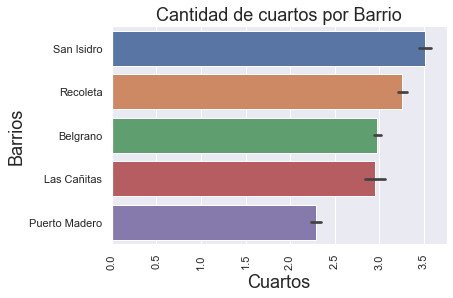

In [84]:
#verificamos la cantidad de cuartos de las propiedades por barrio
plt.xticks(rotation = 90)
barrios = data_f[index_barrios_caros].groupby('l3').mean().sort_values('rooms', ascending=False).index
sns.barplot(x="rooms", y="l3", order=barrios, data=data_f)
plt.title('Cantidad de cuartos por Barrio',fontsize=18)
plt.xlabel('Cuartos',fontsize=18)
plt.ylabel('Barrios',fontsize=18);

vemos que en Puerto Madero las propiedades tienen hasta 2 cuartos aproximadamente

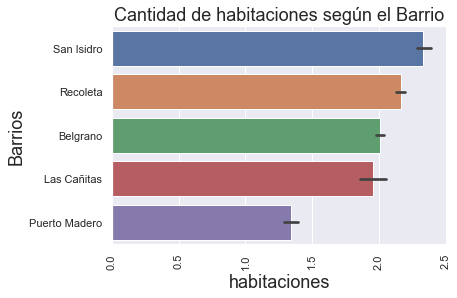

In [85]:
#verificamos la cantidad de habitaciones de las propiedades por barrio
plt.xticks(rotation = 90)
barrios = data_f[index_barrios_caros].groupby('l3').mean().sort_values('bedrooms', ascending=False).index
sns.barplot(x="bedrooms", y="l3", order=barrios, data=data_f)
plt.title('Cantidad de habitaciones según el Barrio',fontsize=18)
plt.xlabel('habitaciones',fontsize=18)
plt.ylabel('Barrios',fontsize=18);

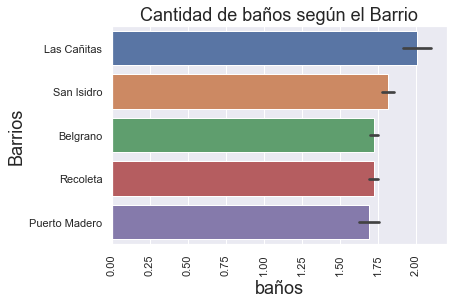

In [86]:
#verificamos la cantidad de baños de las propiedades por barrio
plt.xticks(rotation = 90)
barrios = data_f[index_barrios_caros].groupby('l3').mean().sort_values('bathrooms', ascending=False).index
sns.barplot(x="bathrooms", y="l3", order=barrios, data=data_f)
plt.title('Cantidad de baños según el Barrio',fontsize=18)
plt.xlabel('baños',fontsize=18)
plt.ylabel('Barrios',fontsize=18);

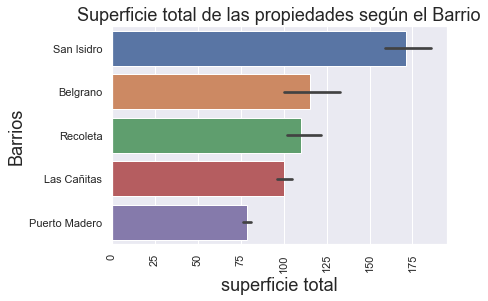

In [87]:
#verificamos la superficie total de las propiedades por barrio
plt.xticks(rotation = 90)
barrios = data_f[index_barrios_caros].groupby('l3').mean().sort_values('surface_total', ascending=False).index
sns.barplot(x="surface_total", y="l3", order=barrios, data=data_f)
plt.title('Superficie total de las propiedades según el Barrio',fontsize=18)
plt.xlabel('superficie total',fontsize=18)
plt.ylabel('Barrios',fontsize=18);

En el gráfico se puede observar observar que las propiedades de Puerto Madero son las que tienen la superficie total más
pequeña,hasta 80 m2, mientras que en los otros barrios las superficies totales son mayores, el barrio que tiene propiedades
con superficies totales más grandes es San Isidro, como vimos en otros gráficos, en este barrio hay gran cantidad de casas
por ejemplo

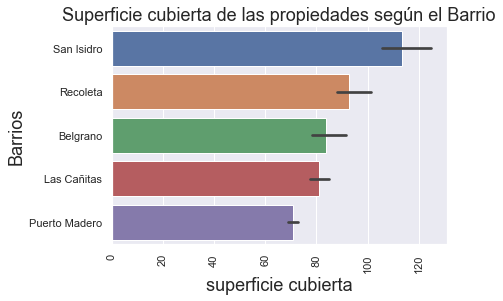

In [88]:
#verificamos la superficie cubierta de las propiedades por barrio
plt.xticks(rotation = 90)
barrios = data_f[index_barrios_caros].groupby('l3').mean().sort_values('surface_covered', ascending=False).index
sns.barplot(x="surface_covered", y="l3", order=barrios, data=data_f)
plt.title('Superficie cubierta de las propiedades según el Barrio',fontsize=18)
plt.xlabel('superficie cubierta',fontsize=18)
plt.ylabel('Barrios',fontsize=18);

La superficie cubierta en Puerto Madero tambien es menor a los otros barrios

Luego de verificar la distribución de los precios en los distintos barrios más caros, puedo observar que todos tienen
propiedades que superan los 600.000 USD, la diferencia que existe entre Puerto Madero y los demás barrios analizados es que 
el promedio y la media de el precio que podemos encontrar en las propiedades en el mismo, son de precios más caros que en los
demas barrios. Mientras que en Belgrano, Recoleta y San Isidro, los valores de las propiedades en promedio están entre 180.000 
y 380.000 USD aproximadamente, en Las Cañitas el promedio esta hasta 430.000 USD aproximadamente, y en Puerto Madero el
promedio comienza en 310.000 aproximadamente hasta 500.000 USD. Otra de las diferencias que observamos que es que en 
Puerto Madero, tanto la superficie cubierta como la total de las propiedades son más pequeñas que en los demás barrios 
analizados, por lo que con esta información se podria decir que el precio USD/m2 es mayor en Puerto Madero que en cualquiera
de los demás barrios

3- Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión

para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal).
Para ello, no debes olvidarte de:
    
Elegir una métrica apropiada para evaluar los resultados de los modelos. Seleccionar las variables predictoras (X) y la 
variable a predecir (y). Realizar un Train/Test split de los datos. Generar un modelo benchmark y evaluarlo.
Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También,
realiza gráficos de valores reales vs. valores predichos. Mejorar el desempeño de sus modelos optimizando el número de vecinos
y la profundidad del árbol, respectivamente. Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? Ser 
crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando
que podría ayudar al modelo?¿Qué información puede estar demás o repetida? Estos lineamientos corresponden al mínimo 
entregable de esta sección.

Importante: para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente
filtrado:

Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa. Selecciona aquellas
propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2. Selecciona aquellas propiedades cuya precio es menor
4000000 dólares. Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price. 
Descarta aquellas instacias con valores faltantes. Checkpoint: deberías obtener un dataset con 81019 instacias y 6 columnas.

In [89]:
#filtrado del dataset
import os

path = os.path.join('c:' + os.sep, 'Users', 'alacivita', 'Desktop', 'Data Cience', 'DS_Proyecto_01_Datos_Properati.csv')
properati = pd.read_csv(path)

In [90]:
properati.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


In [91]:
#Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.

f_property_type = properati["property_type"].isin(["Departamento","Casa","PH"])
f_l2 = properati["l2"].isin(["Capital Federal"])

In [92]:
properati_filtered=properati[f_property_type & f_l2]

In [93]:
properati_filtered.shape

(91485, 19)

In [94]:
#Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.

properati_filtered2= properati_filtered.where((properati_filtered['surface_total'] <= 1000)
                                              &(properati_filtered['surface_total'] >= 15))

In [95]:
#Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.

properati_filtered3=properati_filtered2.where(properati_filtered2['price'] <= 4000000)

In [96]:
#Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.

properati_filtered4= properati_filtered3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

In [97]:
properati_filtered4.head(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0


In [98]:
#Descarta aquellas instacias con valores faltantes.

#buscando valores nulos


missing = properati_filtered4.isnull().sum()# * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': properati_filtered4.columns,'percent_missing': missing})

print(missing_value_data)

                     column_name  percent_missing
rooms                      rooms             9112
bedrooms                bedrooms             9112
bathrooms              bathrooms             9992
surface_total      surface_total             9112
surface_covered  surface_covered             9629
price                      price             9112


In [99]:
properati_filtered4= properati_filtered4.dropna(subset = ["surface_total", "bathrooms", "surface_covered","price","bedrooms"])

In [100]:
properati_filtered4.shape ##81019 instacias y 6 columnas

(81019, 6)

In [101]:
#verifico que se borraron los nulos
missing = properati_filtered4.isnull().sum()# * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': properati_filtered4.columns,'percent_missing': missing})

print(missing_value_data)

                     column_name  percent_missing
rooms                      rooms                0
bedrooms                bedrooms                0
bathrooms              bathrooms                0
surface_total      surface_total                0
surface_covered  surface_covered                0
price                      price                0


In [102]:
#importamos las librerías que necesitaremos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

Tipo de modelo que realizaremos:

Los modelos que utilizaremos en el análisis serán de regresion ya que buscamos predecir una variable numérica

Elegimos la métrica que utilizaremos:

Para evaluar los modelos utilizaremos la métrica "Root Mean Square Error (RMSE)" El RMSE toma el promedio del cuadrado de la
diferencia entre los valores originales y los valores predichos. Nos da la medida de qué tan lejos estaban las predicciones 
del resultado real. Como trabajaremos con valores grandes, a medida que tomamos el cuadrado del error, el efecto de errores
más grandes se vuelve más pronunciado que el error más pequeño, por lo que el modelo ahora puede enfocarse más en los errores
más grandes.

In [103]:
X=properati_filtered4[['surface_total','rooms','bedrooms','surface_covered','bathrooms']] 
y=properati_filtered4['price']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Benchmarking

Para evaluar nuestros modelos primero realizaremos un modelo de base (benchmark) en este caso un modelo de regresion lineal

In [105]:
linear_model = LinearRegression()

In [106]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
print(linear_model.coef_, linear_model.intercept_)

[ 2.06689198e+03  1.33080835e+04 -6.38291124e+04  7.51707414e+01
  1.31441692e+05] -57085.58482740732


In [108]:
y_train_pred_lin=linear_model.predict(X_train)
y_test_pred_lin=linear_model.predict(X_test)

In [109]:
rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
print(rmse_train_lin)
print(rmse_test_lin)

202226.7973850643
195094.858263394


Obtuvimos estos errores, realizando una refresión lineal utilizando todas las variables:

   202226.7973850643

   195094.858263394

La diferencia entre el conjunto test y train es minima

Ahora realizaremos 2 modelos, uno de Arbol de decisión y otro de vecinos más cercanos KNN utilizando todas las variables

Modelo de árbol de decisión

In [111]:
tree=DecisionTreeRegressor(random_state=42)
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [112]:
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [113]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(rmse_train)
print(rmse_test)

54611.69542258247
132674.5361280014


Obtuvimos estos errores:

54611.69542258247

132674.5361280014

Ahora vamos a ir evaluando la métrica hasta obtener la profundidad del arbol que minimice el error.
Vamos a realizar una iteracion para obtener el comportamiento de la métrica con la variación del Max_Depth (Hiperparámetro)

In [114]:
rmse_test_depth=[]
rmse_train_depth=[]
for i in range(1,30):
    tree=DecisionTreeRegressor(max_depth=i,random_state=1)
    tree.fit(X_train,y_train)
    
    y_train_pred=tree.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_train_depth.append(rmse_train)
    
    y_test_pred=tree.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_test_depth.append(rmse_test)

Text(0, 0.5, 'RMSE')

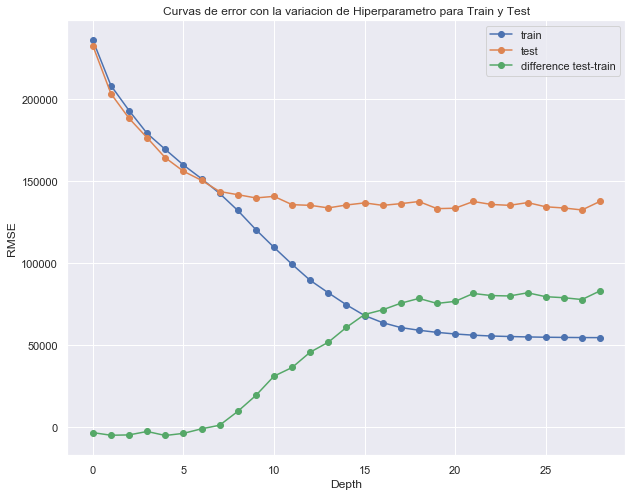

In [115]:
plt.figure(figsize=[10,8])

plt.plot(rmse_train_depth,'o-',label='train')

plt.plot(rmse_test_depth,'o-',label='test')

rmse_difference_train_test=[]
for i in range (len(rmse_train_depth)):
    rmse_difference_train_test.append(rmse_test_depth[i]-rmse_train_depth[i])
plt.plot(rmse_difference_train_test,'o-',label='difference test-train')
plt.title('Curvas de error con la variacion de Hiperparametro para Train y Test')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('RMSE')

Podemos ver que el menor RMSE considerando que no haya un sobreajuste lo obtenemos en maxdepth=7 (profundidad 7)

In [126]:
tree=DecisionTreeRegressor(max_depth=7,random_state=42)
tree.fit(X_train,y_train)
   
y_train_pred=tree.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred=tree.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(rmse_train, rmse_test)

151658.87138992758 150617.28751536136


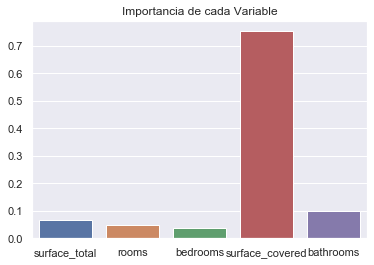

In [117]:
variables_importantes = tree.feature_importances_
columns = X.columns
sns.barplot(columns, variables_importantes)
plt.title('Importancia de cada Variable')
plt.show()

Podemos observar que la variable que tiene más peso o más importante en el properati_filtered4 es la superficie cubierta, 
entonces vamos a realizar los modelos con la superficie cubierta como (X) y precio (y)

Vecinos más cercanos KNN

In [119]:
X=properati_filtered4[['surface_total','rooms','bedrooms','surface_covered','bathrooms']] 
y=properati_filtered4['price']

X_knn=X
y_knn=y

for i in X_knn:

    mean=np.mean(X_knn[i]) #Saco la media
    std=np.std(X_knn[i]) #Saco el desvio estandar
    X_knn[i]=(X_knn[i]-mean)/std #Resto por la media y divido por el desvio
y_knn=(y_knn-np.mean(y_knn))/np.std(y_knn)
print(y_knn)
X_knn

0        -0.370541
1        -0.350471
2        -0.464203
3         0.104458
5        -0.380576
            ...   
146554    1.024350
146555    0.723295
146556    0.890548
146557    0.522591
146558    4.034907
Name: price, Length: 81019, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,surface_total,rooms,bedrooms,surface_covered,bathrooms
0,0.577818,3.049340,4.761479,0.352723,0.523275
1,-0.328295,-0.771555,-0.954624,-0.172473,0.523275
2,-0.651906,-0.771555,-0.954624,-0.255736,-0.649516
3,-0.134128,-0.771555,-0.954624,-0.223711,-0.649516
5,-0.509517,-0.771555,-0.954624,-0.185282,-0.649516
...,...,...,...,...,...
146554,1.030874,0.756803,0.950744,0.166983,1.696067
146555,0.629596,-0.007376,-0.001940,0.314294,0.523275
146556,2.868988,0.756803,-0.001940,0.371938,0.523275
146557,0.642540,-0.007376,-0.001940,0.384748,0.523275


In [120]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_knn,y_knn,test_size=0.3)

In [121]:
data_knn = KNeighborsRegressor()
data_knn.fit(X_train_2,y_train_2)
y_knn_pred_train=data_knn.predict(X_train_2)
y_knn_pred_test=data_knn.predict(X_test_2)

In [122]:
rmse_train_knn = np.sqrt(mean_squared_error(y_train_2, y_knn_pred_train))
rmse_test_knn = np.sqrt(mean_squared_error(y_test_2, y_knn_pred_test))
print(rmse_train)
print(rmse_test)

159995.16100650173
156200.33053996068


Al igual que realizamos la iteración para saber el Max_depth en el modelo de Árbol, ahora lo realizamos para saber el 
número óptimo de vecinos más cercanos a utilizar

In [123]:
rmse_knn_test_depth=[]
rmse_knn_train_depth=[]
for i in range(1,30):
    data_knn = KNeighborsRegressor(n_neighbors=i)
    data_knn.fit(X_train_2,y_train_2)
    
    y_knn_pred_train=data_knn.predict(X_train_2)
    rmse_knn_train = np.sqrt(mean_squared_error(y_train_2, y_knn_pred_train))
    rmse_knn_train_depth.append(rmse_knn_train)
    
    y_knn_pred_test=data_knn.predict(X_test_2)
    rmse_knn_test = np.sqrt(mean_squared_error(y_test_2, y_knn_pred_test))
    rmse_knn_test_depth.append(rmse_knn_test)

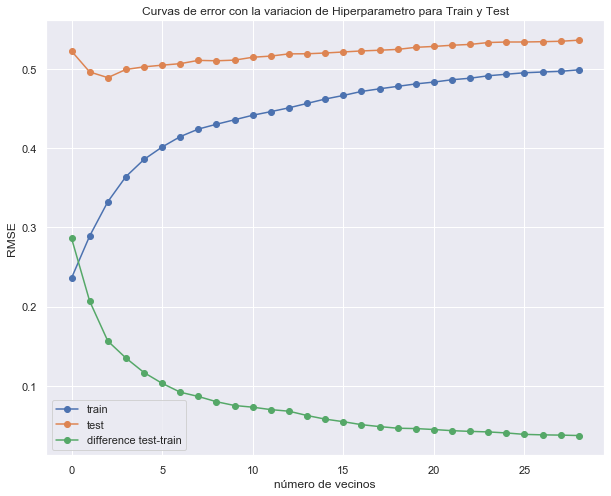

In [124]:
plt.figure(figsize=[10,8])

plt.plot( rmse_knn_train_depth,'o-',label='train')
plt.plot(rmse_knn_test_depth,'o-',label='test')

rmse_difference_train_test=[]
for i in range (len(rmse_knn_train_depth)):
    rmse_difference_train_test.append(rmse_knn_test_depth[i]-rmse_knn_train_depth[i])
plt.plot(rmse_difference_train_test,'o-',label='difference test-train')
plt.legend()
plt.xlabel('número de vecinos')
plt.ylabel('RMSE')
plt.title('Curvas de error con la variacion de Hiperparametro para Train y Test')
plt.show()

Utilizaremos una cantidad de vecinos de 8 ya que a partir de este número de vecinos no hay tanto sobreajuste y menos error

In [125]:
data_knn = KNeighborsRegressor(n_neighbors=7)
data_knn.fit(X_train_2,y_train_2)
    
y_knn_pred_train = data_knn.predict(X_train_2)
rmse_knn_train = np.sqrt(mean_squared_error(y_train_2, y_knn_pred_train))
y_knn_pred_test = data_knn.predict(X_test_2)
rmse_knn_test = np.sqrt(mean_squared_error(y_test_2, y_knn_pred_test))

print(rmse_knn_train,rmse_knn_test)

0.4145460862986107 0.506596213139767


Ahora comparamos

Árbol de decisión
Raíz del error cuadrático medio estandarizado en Train: 151658.87138992758
Raíz del error cuadrático medio estandarizado en Test: 150617.28751536136


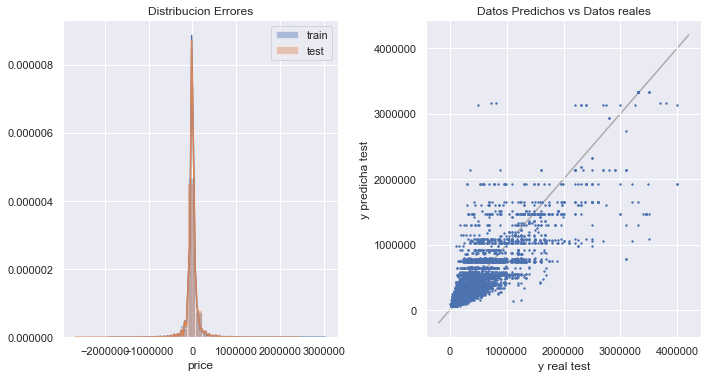

vecinos más cercanos KNN
Raíz del error cuadrático medio estandarizado en Train: 0.4145460862986107
Raíz del error cuadrático medio estandarizado en Test: 0.506596213139767


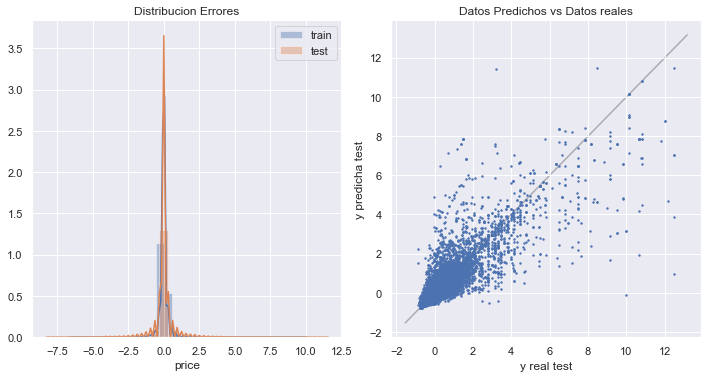

In [128]:
#modelo de árbol
plt.figure(figsize = (10,10))

print('Árbol de decisión')

print(f'Raíz del error cuadrático medio estandarizado en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio estandarizado en Test: {rmse_test}')

plt.subplot(2,2,1)
plt.title('Distribucion Errores')
plt.xlabel('RMSE')
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.legend()

ax = plt.subplot(2,2,2)
plt.title('Datos Predichos vs Datos reales')
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
ax.plot(lims, lims, 'k-', alpha=0.3, zorder=0)

plt.xlabel('y real test')
plt.ylabel('y predicha test')
    
plt.tight_layout()
plt.show()

# vecinos más cercanos KNN 
plt.figure(figsize = (10,10))
print('vecinos más cercanos KNN')

print(f'Raíz del error cuadrático medio estandarizado en Train: {rmse_knn_train}')
print(f'Raíz del error cuadrático medio estandarizado en Test: {rmse_knn_test}')

plt.subplot(2,2,1)
plt.title('Distribucion Errores')
plt.xlabel('RMSE')
sns.distplot(y_train_2 - y_knn_pred_train, bins = 30, label = 'train')
sns.distplot(y_test_2 - y_knn_pred_test, bins = 30, label = 'test')
plt.legend()

ax = plt.subplot(2,2,2)
plt.title('Datos Predichos vs Datos reales')
ax.scatter(y_test_2,y_knn_pred_test, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
ax.plot(lims, lims, 'k-', alpha=0.3, zorder=0)

plt.xlabel('y real test')
plt.ylabel('y predicha test')
plt.tight_layout()
plt.show()


Los errores tanto en el árbol de desición como en el modelo de vecinos más cercanos tienen distribución normal el modelo de
vecinos más cercanos, para poder compararlo con el modelo de árbol, se normalizó por esta razón tienen distinta escala

In [129]:
#para verificar el árbol en escala con el KNN
tree2=DecisionTreeRegressor(max_depth=7,random_state=42)

In [130]:
tree2.fit(X_train_2,y_train_2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [131]:
y_train_pred_tree2=tree2.predict(X_train_2)

In [132]:
rmse_train_tree2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_tree2))

In [133]:
y_test_pred_tree2=tree2.predict(X_test_2)

In [134]:
rmse_test_tree2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_tree2))

In [135]:
#para verificar con regresion lineal
linear_model2=LinearRegression()

In [137]:
linear_model2.fit(X_train_2,y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_train_pred_lin2=linear_model2.predict(X_train_2)

In [139]:
rmse_train_lin2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_lin2))

In [140]:
y_test_pred_lin2=linear_model2.predict(X_test_2)

In [141]:
rmse_test_lin2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_lin2))

In [142]:
print('Errores Tree:                 ',rmse_train_tree2, rmse_test_tree2)
print('Errores KNN:                  ',rmse_knn_train,rmse_knn_test)
print('Errores regresion lineal:     ',rmse_train_lin2,rmse_test_lin2)

Errores Tree:                  0.5012445194951617 0.550168236705773
Errores KNN:                   0.4145460862986107 0.506596213139767
Errores regresion lineal:      0.6615901016773701 0.6871422076578371


Comparando así es más fácil interpretar los modelos. Se puede observar que el modelo de árbol es un poquito más preciso que 
el modelo de vecinos más cercanos, generaliza mejor el modelo de Árbol en este caso eligiendo una profundidad de 6 y en el 
caso del KNN con un número de vecinos=7, comparando con el modelo base (regresión lineal) podemos observar que el mismo es
más "exacto" que los demás, y en cuanto a presicion luego le seguiría el modelo de Arbol

Podriamos terminar aquí el analisis de los modelos, pero para que graficamente interpretemos mejor los modelos para poder, 
ahora utilizaremos una sola variable, que sería la misma variable que vimos anteriormente que es la más representativa:
la superficie cubierta "surface_covered"

In [143]:
X=properati_filtered4[['surface_covered']] 
y=properati_filtered4['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Realizamos otro modelo base con solo la variable suerface_covered para poder comparar (regresion lineal)

In [144]:
linear_model3=LinearRegression()

In [145]:
linear_model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
y_train_pred_lin3=linear_model3.predict(X_train)

In [147]:
rmse_train_lin3 = np.sqrt(mean_squared_error(y_train, y_train_pred_lin3))

In [148]:
y_test_pred_lin3=linear_model3.predict(X_test)

In [149]:
rmse_test_lin3 = np.sqrt(mean_squared_error(y_test, y_test_pred_lin3))

In [150]:
print('Errores regresion lineal:     ',rmse_train_lin3,rmse_test_lin3)

Errores regresion lineal:      283829.64003498247 288872.74328847445


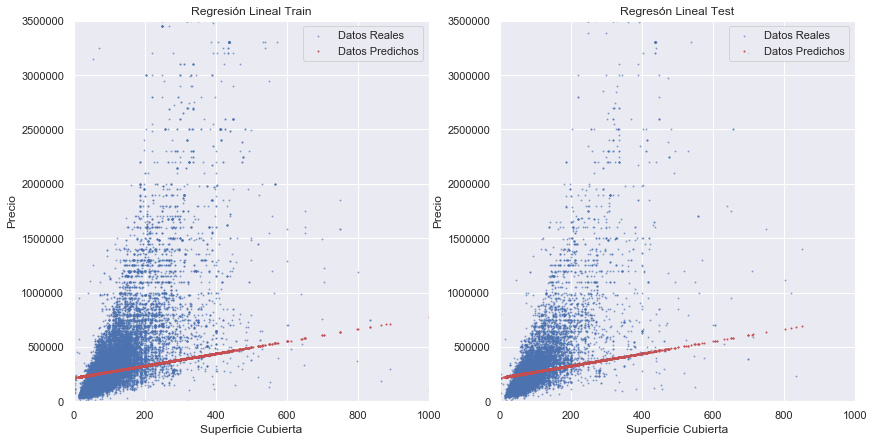

In [151]:
plt.figure(figsize=[14,7])

plt.subplot(1,2,1)

plt.title('Regresión Lineal Train')

plt.scatter(X_train,y_train, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_train,y_train_pred_lin3, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([0,1000])
plt.ylim([0,3.5 *10**6])

plt.subplot(1,2,2)

plt.title('Regresón Lineal Test')

plt.scatter(X_test,y_test, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_test,y_test_pred_lin3, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([0,1000])
plt.ylim([0,3.5 *10**6])

plt.show()

Comenzamos con el análisis del modelo de árbol

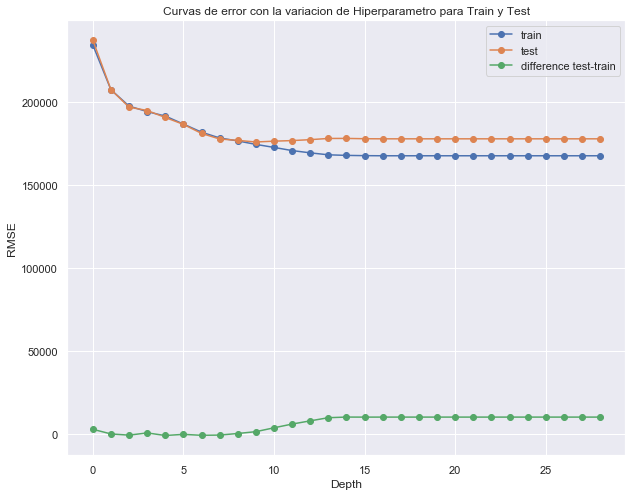

In [152]:
rmse_test_depth=[]
rmse_train_depth=[]
for i in range(1,30):
    tree=DecisionTreeRegressor(max_depth=i,random_state=1)
    tree.fit(X_train,y_train)
    
    y_train_pred=tree.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_train_depth.append(rmse_train)
    
    y_test_pred=tree.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_test_depth.append(rmse_test)
    
plt.figure(figsize=[10,8])

plt.plot(rmse_train_depth,'o-',label='train')

plt.plot(rmse_test_depth,'o-',label='test')

rmse_difference_train_test=[]
for i in range (len(rmse_train_depth)):
    rmse_difference_train_test.append(rmse_test_depth[i]-rmse_train_depth[i])
plt.plot(rmse_difference_train_test,'o-',label='difference test-train')

plt.legend()
plt.title('Curvas de error con la variacion de Hiperparametro para Train y Test')
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.show()

Utilizaremos max_depth = 10

In [154]:
tree=DecisionTreeRegressor(max_depth=10,random_state=42)
tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [155]:
rmse_tree_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_tree_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

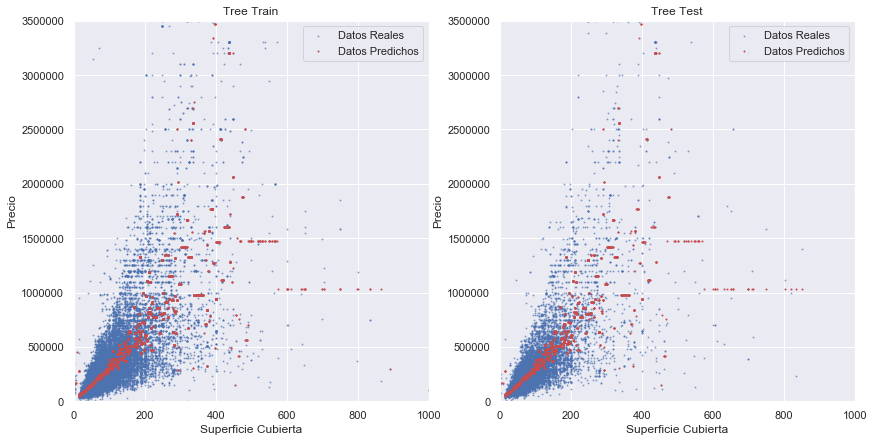

In [156]:
plt.figure(figsize=[14,7])

plt.subplot(1,2,1)

plt.title('Tree Train')

plt.scatter(X_train,y_train, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_train,y_train_pred, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([0,1000])
plt.ylim([0,3.5 *10**6])

plt.subplot(1,2,2)

plt.title('Tree Test')

plt.scatter(X_test,y_test, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_test,y_test_pred, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([0,1000])
plt.ylim([0,3.5 *10**6])

plt.show()


Ahora hacemos el análisis para vecinos más cercanos KNN

In [157]:
X_knn=X
y_knn=y
for i in X_knn:
    mean=np.mean(X_knn[i])
    std=np.std(X_knn[i])
    X_knn[i]=(X_knn[i]-mean)/std
y_knn=(y_knn-np.mean(y_knn))/np.std(y_knn)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_knn,y_knn,test_size=0.3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
rmse_knn_test_depth=[]
rmse_knn_train_depth=[]
for i in range(1,30):
    data_knn = KNeighborsRegressor(n_neighbors=i)
    data_knn.fit(X_train_2,y_train_2)
    
    y_knn_pred_train=data_knn.predict(X_train_2)
    rmse_knn_train = np.sqrt(mean_squared_error(y_train_2, y_knn_pred_train))
    rmse_knn_train_depth.append(rmse_knn_train)
    
    y_knn_pred_test=data_knn.predict(X_test_2)
    rmse_knn_test = np.sqrt(mean_squared_error(y_test_2, y_knn_pred_test))
    rmse_knn_test_depth.append(rmse_knn_test)

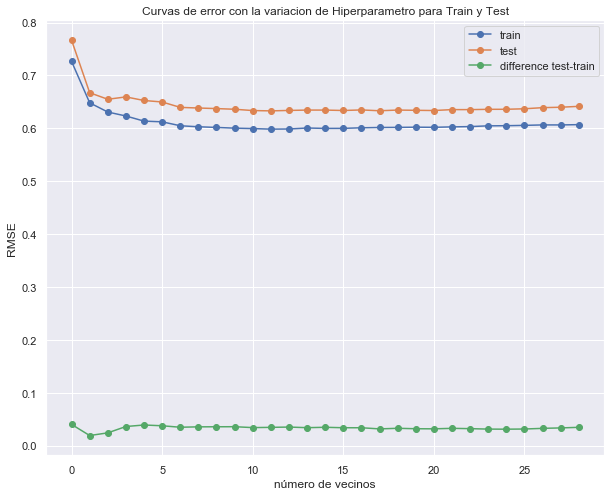

In [159]:
plt.figure(figsize=[10,8])

plt.plot( rmse_knn_train_depth,'o-',label='train')
plt.plot(rmse_knn_test_depth,'o-',label='test')


rmse_difference_train_test=[]
for i in range (len(rmse_knn_train_depth)):
    rmse_difference_train_test.append(rmse_knn_test_depth[i]-rmse_knn_train_depth[i])
plt.plot(rmse_difference_train_test,'o-',label='difference test-train')
plt.legend()
plt.title('Curvas de error con la variacion de Hiperparametro para Train y Test')
plt.xlabel('número de vecinos')
plt.ylabel('RMSE')
plt.show()

vamos a utilizar 3 vecinos

In [160]:
data_knn = KNeighborsRegressor(n_neighbors=3)
data_knn.fit(X_train_2,y_train_2)
    
y_knn_pred_train=data_knn.predict(X_train_2)
y_knn_pred_test=data_knn.predict(X_test_2)

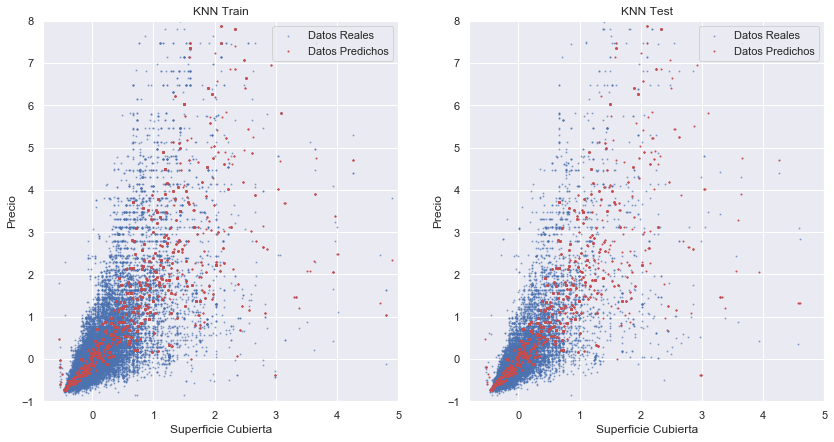

In [161]:
plt.figure(figsize=[14,7])

plt.subplot(1,2,1)

plt.title('KNN Train')

plt.scatter(X_train_2,y_train_2, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_train_2,y_knn_pred_train, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([-0.8,5])
plt.ylim([-1,8])

plt.subplot(1,2,2)


plt.title('KNN Test')

plt.scatter(X_test_2,y_test_2, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_test_2,y_knn_pred_test, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([-0.8,5])
plt.ylim([-1,8])

plt.show()

Ahora comparamos los modelos


In [162]:
print('Errores regresion lineal:     ',rmse_train_lin3,rmse_test_lin3)
print('Errores KNN:                  ',rmse_knn_train,rmse_knn_test)
print('Errores tree:                 ',rmse_tree_train,rmse_tree_test)

Errores regresion lineal:      283829.64003498247 288872.74328847445
Errores KNN:                   0.6070102542032271 0.6416044936870048
Errores tree:                  174410.19940348263 175845.33034360042


Verificamos que los 3 modelos son bastante precisos, pero quien generaliza más es el modelo de vecinos más cercanos

Ahora graficamos la comparación del modelo de árbol y de vecinos más cercanos

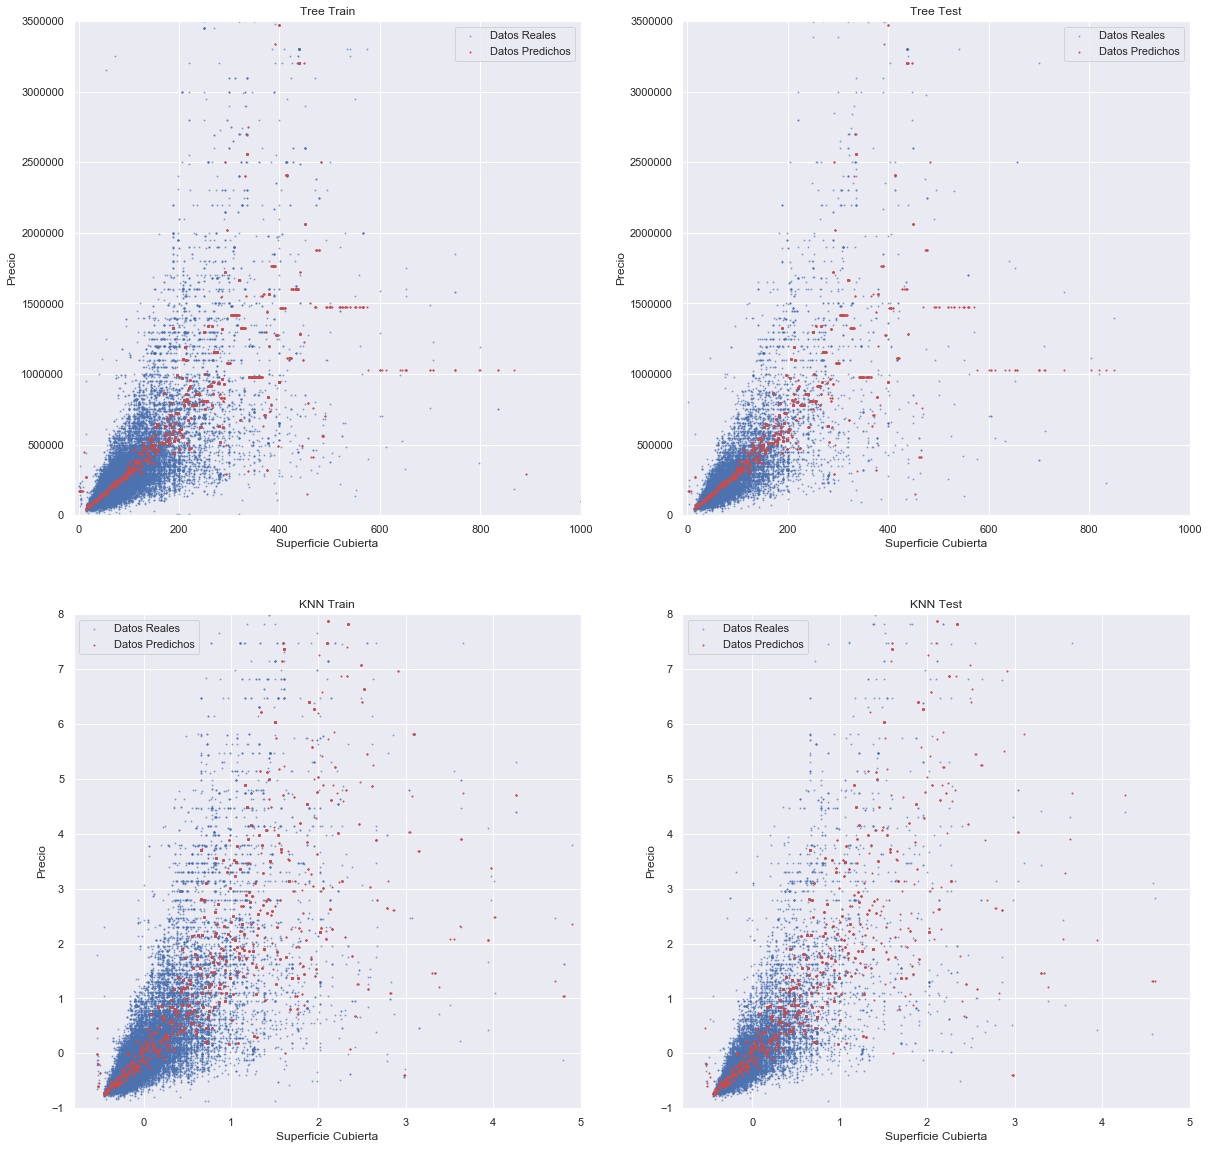

In [163]:
plt.figure(figsize=[20,20])

plt.subplot(2,2,1)


plt.title('Tree Train')

plt.scatter(X_train,y_train, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_train,y_train_pred, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([-10,1000])
plt.ylim([-10,3.5 *10**6])

plt.subplot(2,2,2)


plt.title('Tree Test')

plt.scatter(X_test,y_test, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_test,y_test_pred, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')


plt.xlim([-10,1000])
plt.ylim([-10,3.5 *10**6])


plt.subplot(2,2,3)

plt.title('KNN Train')

plt.scatter(X_train_2,y_train_2, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_train_2,y_knn_pred_train, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([-0.8,5])
plt.ylim([-1,8])

plt.subplot(2,2,4)


plt.title('KNN Test')

plt.scatter(X_test_2,y_test_2, s = 1,alpha=0.5,label='Datos Reales')
plt.scatter(X_test_2,y_knn_pred_test, s = 1,c='r',label='Datos Predichos')

plt.legend()
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.xlim([-0.8,5])
plt.ylim([-1,8])

plt.show()


Según estos gráficos podemos observar que el modelo de vecinos más cercanos (en este caso con 3 vecinos) se adapta un poco
mejor a valores grandes, que el modelo de árbol de decisión (en este caso con profundidad de 10). Por ejemplo si vemos que la
superficie cubierta en relacion al precio, a mayor superficie cubierta, mayor deberia ser el precio, con el modelo del Árbol 
que si una propiedad tiene desde de 300 m2 aproximadamente toma un precio de 700000 USD, cuando debería tomar un precio mayor.
En este caso por los modelos analizados, me quedaría con el modelo de KNN vecinos más cercanos.

En este análisis los datos están relacionados al tamaño, cuando en el precio de una propiedad hay muchas más variables 
que afectan al mismo. Podríamos utilizar el modelo de vecinos más cercanos, pero sería útil utilizar variables categóricas
en el análisis como por ejemplo la ubicación, la misma es una variable clave en la determinacion del precio, ya que como
analizamos anteriormente,no es lo mismo el precio de el m2 por ejemplo en el barrio de Recoleta que en otro barrio más 
económico. La variable 'l3'(Barrios) hubiece sido de gran utilidad en el modelo.
Más allá de poder agregar la ubicación de las propiedades al modelo, también se podría haber agregado lavariable'property_type'
que describe el tipo de propiedad (si se trata de una casa, un departamento ,un PH etc) o alguna variable que indique que 
los servicios de las propiedades analizadas, entre otras.